In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import matplotlib.pyplot as plt
from skimage.io import imread
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path
from torchvision import transforms as tfs
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
from collections import defaultdict

In [3]:
import numpy as np
import pandas as pd

import random
from glob import glob
import os, shutil
from tqdm import tqdm
tqdm.pandas()
import time
import copy
import joblib
from collections import defaultdict
import gc
from IPython import display as ipd

# visualization
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sklearn
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedGroupKFold

# PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp

import timm

# Albumentations for augmentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

import rasterio
from joblib import Parallel, delayed

# For colored terminal text
from colorama import Fore, Back, Style
c_  = Fore.GREEN
sr_ = Style.RESET_ALL

import warnings
warnings.filterwarnings("ignore")

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import pydicom as dicom
import nibabel as nib
import sys
import glob
import os
import numpy as np
import h5py
from sklearn.preprocessing import StandardScaler

c:\Users\User\anaconda3\envs\MRI_NiR\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp

import timm
import tifffile as tiff

In [5]:
def read_labels_from_file(file_path):
    values = []
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            try:
                value = int(line.split(': ')[1])
            except ValueError:
                value = line.split(': ')[1].strip()  # Если значение не может быть преобразовано в int, оставляем его как строку
            if str(value) in ['3а'  ,'3','3a']:
                value = '3a'
            values.append(value)
    return values

In [149]:
def load_tif_mask(x_path, y_path, mask_pth, num_imgs=10,img_size=512):
    images = []
    labels = []
    image =  tiff.imread(x_path)
    # mask = Image.open(mask_pth)
    i = 0
    # image = [np.fliplr(np.array(img)) for img in image]
    middle = len(image)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(image), middle + num_imgs2)

    images = np.array(image[p1:p2])

    # while len(images)<10:
        # try:
        #     mask.seek(i)
        #     mask_array = np.array(mask)
        #     image.seek(i)
        #     image_array = np.array(image)
        #     if sum(sum(mask_array)) > 0:
        #         images.append(image_array)
        #         labels.append(read_labels_from_file(y_path))
        #     i += 1
        # except EOFError:
        #     break

    if len(images)<num_imgs:
        
        n_zero = np.zeros((num_imgs - images.shape[0],img_size, img_size))
        images = np.concatenate((images,  n_zero), axis =0)

            
    labels = read_labels_from_file(y_path)
    return images, labels

In [150]:
def load_tif_mask_inv(x_path, y_path, mask_pth, num_imgs=10,img_size=512):
    images = []
    labels = []
    image =  tiff.imread(x_path)
    image = [np.fliplr(np.array(img)) for img in image]
    # mask = Image.open(mask_pth)
    i = 0

    middle = len(image)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(image), middle + num_imgs2)

    images = np.array(image[p1:p2])


    if len(images)<num_imgs:
        
        n_zero = np.zeros((num_imgs - images.shape[0],img_size, img_size))
        images = np.concatenate((images,  n_zero), axis =0)

            
    labels = read_labels_from_file(y_path)[::-1]

    return images, labels

In [8]:
load_tif_mask(x_pth_train[0],y_pth_train[0][1],x_pth_train[0][0])

NameError: name 'x_pth_train' is not defined

In [9]:
def get_pathes_mask(path):
    x_pathes_all = []
    y_pathes_all = []
    for patient in os.listdir(path):
            x_pathes = []
            y_pathes = []
        
            for ID_s in os.listdir(path + '/'+ patient ):
                if 'ID' in ID_s:
                    msk_t1 = 0
                    msk_t2 = 0  
                    for tif_name in os.listdir(path + '/'+ patient + '/'+ID_s):
                        if 'Cor' in tif_name:
                            if 'T1' in tif_name:
                
                                if  'mask' not in tif_name.lower():
                                    x_pathes.append(path + '/'+ patient + '/' + ID_s + '/'+ tif_name)

                                elif 'mask' in tif_name.lower():
                                    msk_t1 = 1
                                    y_pathes.append([path + '/'+ patient + '/'+ID_s + '/' + tif_name,path + '/'+ patient + '/' +'labels.txt'])

                            elif 'T2' in tif_name:
                                
                                if 'mask' not in tif_name.lower():
                                    x_pathes.append(path + '/'+ patient + '/'+ID_s + '/' + tif_name)
                                
                                elif 'mask' in tif_name.lower():
                                    msk_t2 = 1
                                    y_pathes.append([path + '/'+ patient + '/'+ID_s + '/' + tif_name,path + '/'+ patient + '/' +'labels.txt'])
                            
                    if msk_t1==0:
                        x_pathes.pop()
                    if msk_t2==0:
                        x_pathes.pop()
                            
            x_pathes_all.append(x_pathes)
            y_pathes_all.append(y_pathes)
    return x_pathes_all, y_pathes_all

In [10]:
def get_pathes(path):
    x_pathes_all = []
    y_pathes_all = []
    for patient in os.listdir(path):
        x_pathes = []
        y_pathes = []
        
        for ID_s in os.listdir(path + '/'+ patient ):
            if 'ID' in ID_s:
                for tif_name in os.listdir(path + '/'+ patient + '/'+ID_s):
    
                    if 'Cor' in tif_name:
                        if 'T1' in tif_name:

                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/' + ID_s + '/'+ tif_name)
                                y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            # y_pathes.append(path + '/'+ patient + '/' + tif_name)

                        elif 'T2' in tif_name:
                            
                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/'+ID_s + '/' + tif_name)
                                y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            #     y_pathes.append(path + '/'+ patient + '/' + tif_name)
                    
                        
        x_pathes_all.append(x_pathes)
        y_pathes_all.append(y_pathes)
    
    return x_pathes_all, y_pathes_all

In [11]:
def sorting_key(file_path):
    base_name = os.path.basename(file_path)
    if "Cor T1" in base_name:
        return 0
    elif "Cor T2" in base_name:
        return 1
    elif "Sag T1" in base_name:
        return 2
    elif "Sag T2" in base_name:
        return 3
    else:
        return 4  # Любое значение, более высокое чем остальные

# Применение сортировки к каждому списку файлов в каталоге
def sort_and_merge_images(images):
    cor_t1 = sorted([img for img in images if 'Cor T1' in img])
    sag_t1 = sorted([img for img in images if 'Sag T1' in img])
    cor_t2 = sorted([img for img in images if 'Cor T2' in img])
    sag_t2 = sorted([img for img in images if 'Sag T2' in img])
    
    # Создаем итоговый список
    final_list = [
        [*cor_t1, *sag_t1],
        [*cor_t2, *sag_t2]
    ]
    
    return final_list


In [12]:
def get_pathes_sag(path):
    x_pathes_all = []
    y_pathes_all = []
    for patient in os.listdir(path):
        x_pathes = []
        y_pathes = []
        
        for ID_s in os.listdir(path + '/'+ patient ):
            if 'ID' in ID_s:
                for tif_name in os.listdir(path + '/'+ patient + '/'+ID_s):

                    if 'Cor' in tif_name:
                        if 'T1' in tif_name:
                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/' + ID_s + '/'+ tif_name)
                                y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            # y_pathes.append(path + '/'+ patient + '/' + tif_name)

                        elif 'T2' in tif_name:
                            
                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/'+ID_s + '/' + tif_name)
                                y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            #     y_pathes.append(path + '/'+ patient + '/' + tif_name)
                    
                    elif 'Sag' in tif_name:
                        if 'T1' in tif_name:

                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/' + ID_s + '/'+ tif_name)
                                # y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            # y_pathes.append(path + '/'+ patient + '/' + tif_name)

                        elif 'T2' in tif_name:
                            
                            if 'mask' not in tif_name.lower():
                                x_pathes.append(path + '/'+ patient + '/'+ID_s + '/' + tif_name)
                                # y_pathes.append(path + '/'+ patient + '/' +'labels.txt')
                            # elif 'mask' in tif_name.lower():
                            #     y_pathes.append(path + '/'+ patient + '/' + tif_name)
        
        x_pathes_all.append(sort_and_merge_images(x_pathes))
        y_pathes_all.append(y_pathes)
    
    return x_pathes_all, y_pathes_all

In [12]:
x_tr,y_tr,x_v,y_v = np.concatenate((x_train_inv, x_train), axis=0),np.concatenate((y_train_inv, y_train), axis=0),np.concatenate((x_val_inv, x_val), axis=0),np.concatenate((y_val_inv, y_val), axis=0)

NameError: name 'x_train_inv' is not defined

In [13]:
file_path = os.path.join('data_TEST/ID_65', 'labels.txt')

values = read_labels_from_file('data_TEST/ID_89/labels.txt')[::-1]
print(values)

['3a', 4]


In [307]:
x_pth ,y_pth = get_pathes_mask('data_29_05_24_cls108_seg72')

In [13]:
x_pth ,y_pth = get_pathes('data_08_06_24_cls141_seg105')

In [187]:
x_pth ,y_pth = get_pathes_sag('data_08_06_24_cls141_seg105')

In [166]:
x_pth

[['data_08_06_24_cls141_seg105/ID_1/ID 1/ID1_Cor T1+C_SE11.tif',
  'data_08_06_24_cls141_seg105/ID_1/ID 1/ID1_Cor T2_SE5.tif'],
 ['data_08_06_24_cls141_seg105/ID_10/ID 10/ID10_ Cor T1+C_SE19.tif',
  'data_08_06_24_cls141_seg105/ID_10/ID 10/ID10_Cor T2_SE13.tif'],
 ['data_08_06_24_cls141_seg105/ID_101/ID101/ID101_Cor T1 FSE+C_SE13.tif',
  'data_08_06_24_cls141_seg105/ID_101/ID101/ID101_Cor T2 FRFSE 2mm_SE6.tif'],
 ['data_08_06_24_cls141_seg105/ID_102/ID102/ID102_ Cor T1 SE+C_SE8.tif',
  'data_08_06_24_cls141_seg105/ID_102/ID102/ID102_Cor T2 FSE (Thin)_SE5.tif'],
 ['data_08_06_24_cls141_seg105/ID_103/ID103/ID103_ Cor T1 SE+C_SE10.tif',
  'data_08_06_24_cls141_seg105/ID_103/ID103/ID103_Cor T2 FSE (Thin)_SE6.tif'],
 ['data_08_06_24_cls141_seg105/ID_104/ID104/ID104_ Cor T1 SE+C_SE9.tif',
  'data_08_06_24_cls141_seg105/ID_104/ID104/ID104_Cor T2 FSE (Thin)_SE5.tif'],
 ['data_08_06_24_cls141_seg105/ID_105/ID105/ID105_ Cor T1 SE+C_SE11.tif',
  'data_08_06_24_cls141_seg105/ID_105/ID105/ID105_Cor

In [57]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [15]:
x_pth_train,x_pth_val,y_pth_train,y_pth_val = train_test_split(x_pth , y_pth, test_size=0.25)


x_pth_train,y_pth_train,x_pth_val,y_pth_val = flatten(x_pth_train) ,flatten(y_pth_train),flatten(x_pth_val),flatten(y_pth_val)
print(len(x_pth_train))

210


In [16]:
y_pth_train

['data_08_06_24_cls141_seg105/ID_41/labels.txt',
 'data_08_06_24_cls141_seg105/ID_41/labels.txt',
 'data_08_06_24_cls141_seg105/ID_13/labels.txt',
 'data_08_06_24_cls141_seg105/ID_13/labels.txt',
 'data_08_06_24_cls141_seg105/ID_64/labels.txt',
 'data_08_06_24_cls141_seg105/ID_64/labels.txt',
 'data_08_06_24_cls141_seg105/ID_149/labels.txt',
 'data_08_06_24_cls141_seg105/ID_149/labels.txt',
 'data_08_06_24_cls141_seg105/ID_14/labels.txt',
 'data_08_06_24_cls141_seg105/ID_14/labels.txt',
 'data_08_06_24_cls141_seg105/ID_26/labels.txt',
 'data_08_06_24_cls141_seg105/ID_26/labels.txt',
 'data_08_06_24_cls141_seg105/ID_155/labels.txt',
 'data_08_06_24_cls141_seg105/ID_155/labels.txt',
 'data_08_06_24_cls141_seg105/ID_182/labels.txt',
 'data_08_06_24_cls141_seg105/ID_182/labels.txt',
 'data_08_06_24_cls141_seg105/ID_101/labels.txt',
 'data_08_06_24_cls141_seg105/ID_101/labels.txt',
 'data_08_06_24_cls141_seg105/ID_160/labels.txt',
 'data_08_06_24_cls141_seg105/ID_160/labels.txt',
 'data_08_

In [17]:
x_pth_train

['data_08_06_24_cls141_seg105/ID_41/ID41/ID41_Cor T1 FSE+C_SE11.tif',
 'data_08_06_24_cls141_seg105/ID_41/ID41/ID41_Cor T2 FRFSE 2mm_SE7.tif',
 'data_08_06_24_cls141_seg105/ID_13/ID 13/ID13_ Cor T1+C_SE7.tif',
 'data_08_06_24_cls141_seg105/ID_13/ID 13/ID13_Cor T2_SE4.tif',
 'data_08_06_24_cls141_seg105/ID_64/ID64/ID64_Cor T1 FSE+C_SE12.tif',
 'data_08_06_24_cls141_seg105/ID_64/ID64/ID64_Cor T2 FRFSE 2mm_SE7.tif',
 'data_08_06_24_cls141_seg105/ID_149/ID149/ID149_Cor T1 FSE+C_SE12.tif',
 'data_08_06_24_cls141_seg105/ID_149/ID149/ID149_Cor T2 FRFSE 2mm_SE8.tif',
 'data_08_06_24_cls141_seg105/ID_14/ID 14/ID14_Cor T1+C_SE13.tif',
 'data_08_06_24_cls141_seg105/ID_14/ID 14/ID14_Cor T2_SE6.tif',
 'data_08_06_24_cls141_seg105/ID_26/ID26/ID26_ Cor T1 SE+C_SE11.tif',
 'data_08_06_24_cls141_seg105/ID_26/ID26/ID26_Cor T2 FSE (Thin)_SE5.tif',
 'data_08_06_24_cls141_seg105/ID_155/ID155/ID155_Cor T1 FSE+C_SE12.tif',
 'data_08_06_24_cls141_seg105/ID_155/ID155/ID155_Cor T2 FRFSE 2mm_SE8.tif',
 'data_08_

In [107]:
class MedicalDataset(torch.utils.data.Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        self.knsop_labels = {'0':0,'1':1,'2':2,'3a':3,'3b':3,'4':4}

    def __len__(self):
    
        return len(self.file_paths)

    def __getitem__(self, idx):
        img,y_train = load_tif_mask(self.file_paths[idx],self.labels[idx],self.labels[idx]) #load_tif_mask(x_path, y_path[1],y_path[0])
        img_data = np.array(img).astype(np.float32)     
        label = y_train


        if self.transform:
            res_img = np.zeros((len(img_data),224, 224))
            for i in range(len(img_data)):
          
                data = self.transform(image=np.array(img_data[i], dtype=np.float32))
                res_img[i]=(data['image'])
            
            res_img = (res_img - np.min(res_img)) / (np.max(res_img) - np.min(res_img))
            img_data = np.expand_dims(res_img, axis=0)
            
        else:
            img_data = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))  # Нормализация
            img_data = np.expand_dims(img_data, axis=0)  # Добавляем канал

        # Left = self.knsop_labels[str(label[0])]
        Right = self.knsop_labels[str(label[1])]
        # res = np.max([Left,Right])
        
        sample = {
            "image":torch.from_numpy(img_data),
            "labelS":Right
            # "labelR": self.knsop_labels[str(y[1])],
            }
        return sample

In [19]:
def load_tif_mask_sag(x_path, y_path, mask_pth, num_imgs=10,img_size=512):
    images = []
    labels = []
    sagitals = []
    image =  tiff.imread(x_path[0])
    # mask = Image.open(mask_pth)
    i = 0
    # image = [np.fliplr(np.array(img)) for img in image]
    middle = len(image)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(image), middle + num_imgs2)
    images = np.array(image[p1:p2])

    if len(images)<10:
        n_zero = np.zeros((num_imgs - images.shape[0],img_size, img_size))
        images = np.concatenate((images,  n_zero), axis =0)

    sag = tiff.imread(x_path[1])
    # sag = [np.fliplr(np.array(img)) for img in sag]
    middle = len(sag)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(sag), middle + num_imgs2)

    sagitals = np.array(sag[p1:p2])
    if len(sagitals)<10:
        n_zero = np.zeros((num_imgs - sagitals.shape[0],img_size, img_size))
        sagitals = np.concatenate((sagitals,  n_zero), axis =0)
            
    labels = read_labels_from_file(y_path)
    return images,sagitals,labels

In [20]:
def load_tif_mask_inv_sag(x_path, y_path, mask_pth, num_imgs=10,img_size=512):
    images = []
    labels = []
    sagitals = []
    image =  tiff.imread(x_path[0])
    # mask = Image.open(mask_pth)
    i = 0
    image = [np.fliplr(np.array(img)) for img in image]
    middle = len(image)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(image), middle + num_imgs2)
    images = np.array(image[p1:p2])

    if len(images)<10:
        n_zero = np.zeros((num_imgs - images.shape[0],img_size, img_size))
        images = np.concatenate((images,  n_zero), axis =0)

    sag = tiff.imread(x_path[1])
    # sag = [np.fliplr(np.array(img)) for img in sag]
    middle = len(sag)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(sag), middle + num_imgs2)

    sagitals = np.array(sag[p1:p2])
    if len(sagitals)<10:
        n_zero = np.zeros((num_imgs - sagitals.shape[0],img_size, img_size))
        sagitals = np.concatenate((sagitals,  n_zero), axis =0)
            
    labels = read_labels_from_file(y_path)[::-1]
    return images,sagitals,labels

In [21]:
class MedicalDatasetSag(torch.utils.data.Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        self.knsop_labels = {'0':0,'1':1,'2':2,'3a':3,'3b':4,'4':5}

    def __len__(self):
    
        return len(self.file_paths)

    def __getitem__(self, idx):
     
        img,sag,y_train = load_tif_mask_sag(self.file_paths[idx],self.labels[idx],self.labels[idx]) #load_tif_mask(x_path, y_path[1],y_path[0])


        img_data = np.array(img).astype(np.float32)     
        sag_data = np.array(sag).astype(np.float32)
        label = y_train


        if self.transform:
            res_img = np.zeros((len(img_data),224, 224))
            res_sag = np.zeros((len(sag_data),224, 224))
            for i in range(len(img_data)):
        
                data = self.transform(image=np.array(img_data[i], dtype=np.float32))
                res_img[i]=(data['image'])

                data_sag = self.transform(image=np.array(sag_data[i], dtype=np.float32))
                res_sag[i]=(data_sag['image'])
            
            res_img = (res_img - np.min(res_img)) / (np.max(res_img) - np.min(res_img))
            img_data = np.expand_dims(res_img, axis=0)

            res_sag = (res_sag - np.min(res_sag)) / (np.max(res_sag) - np.min(res_sag))
            sag_data = np.expand_dims(res_sag, axis=0)
            
        else:
            img_data = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))  # Нормализация
            img_data = np.expand_dims(img_data, axis=0)  # Добавляем канал

            sag_data = (sag_data - np.min(sag_data)) / (np.max(sag_data) - np.min(sag_data))  # Нормализация
            sag_data = np.expand_dims(sag_data, axis=0)  # Добавляем канал

        # Left = self.knsop_labels[str(label[0])]
        Right = self.knsop_labels[str(label[1])]
        # res = np.max([Left,Right])
        
        sample = {
            "image":torch.from_numpy(img_data),
            "sag":torch.from_numpy(sag_data),
            "labelS":Right
            # "labelR": self.knsop_labels[str(y[1])],
            }
        return sample

In [22]:
class MedicalDatasetInvSag(torch.utils.data.Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        self.knsop_labels = {'0':0,'1':1,'2':2,'3a':3,'3b':4,'4':5}

    def __len__(self):
    
        return len(self.file_paths)

    def __getitem__(self, idx):
     
        img,sag,y_train = load_tif_mask_inv_sag(self.file_paths[idx],self.labels[idx],self.labels[idx]) #load_tif_mask(x_path, y_path[1],y_path[0])


        img_data = np.array(img).astype(np.float32)     
        sag_data = np.array(sag).astype(np.float32)
        label = y_train


        if self.transform:
            res_img = np.zeros((len(img_data),224, 224))
            res_sag = np.zeros((len(sag_data),224, 224))
            for i in range(len(img_data)):
        
                data = self.transform(image=np.array(img_data[i], dtype=np.float32))
                res_img[i]=(data['image'])

                data_sag = self.transform(image=np.array(sag_data[i], dtype=np.float32))
                res_sag[i]=(data_sag['image'])
            
            res_img = (res_img - np.min(res_img)) / (np.max(res_img) - np.min(res_img))
            img_data = np.expand_dims(res_img, axis=0)

            res_sag = (res_sag - np.min(res_sag)) / (np.max(res_sag) - np.min(res_sag))
            sag_data = np.expand_dims(res_sag, axis=0)
            
        else:
            img_data = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))  # Нормализация
            img_data = np.expand_dims(img_data, axis=0)  # Добавляем канал

            sag_data = (sag_data - np.min(sag_data)) / (np.max(sag_data) - np.min(sag_data))  # Нормализация
            sag_data = np.expand_dims(sag_data, axis=0)  # Добавляем канал

        # Left = self.knsop_labels[str(label[0])]
        Right = self.knsop_labels[str(label[1])]
        # res = np.max([Left,Right])
        
        sample = {
            "image":torch.from_numpy(img_data),
            "sag":torch.from_numpy(sag_data),
            "labelS":Right
            # "labelR": self.knsop_labels[str(y[1])],
            }
        return sample

In [23]:
def load_tif_mask_inv_sag(x_path, y_path, mask_pth, num_imgs=10,img_size=512):
    images = []
    labels = []
    image =  tiff.imread(x_path)
    # mask = Image.open(mask_pth)
    i = 0

    middle = len(image)//2
    num_imgs2 = num_imgs//2

    p1 = max(0, middle - num_imgs2)
    p2 = min(len(image), middle + num_imgs2)

    images = np.array(image[p1:p2])

    # while len(images)<10:
        # try:
        #     mask.seek(i)
        #     mask_array = np.array(mask)
        #     image.seek(i)
        #     image_array = np.array(image)
        #     if sum(sum(mask_array)) > 0:
        #         images.append(image_array)
        #         labels.append(read_labels_from_file(y_path))
        #     i += 1
        # except EOFError:
        #     break

    if len(images)<10:
        
        n_zero = np.zeros((num_imgs - images.shape[0],img_size, img_size))
        images = np.concatenate((images,  n_zero), axis =0)

            
    labels = read_labels_from_file(y_path)[::-1]

    return images, labels

In [106]:
class MedicalDatasetInv(torch.utils.data.Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        self.knsop_labels = {'0':0,'1':1,'2':2,'3a':3,'3b':3,'4':4}

    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        img,y_train = load_tif_mask_inv(self.file_paths[idx] ,self.labels[idx],self.labels[idx]) #load_tif_mask(x_path, y_path[1],y_path[0])
        # print(img.shape,type(img))
        img_data = np.array(img).astype(np.float32)     
        label = y_train


        if self.transform:
            res_img = np.zeros((len(img_data),224, 224))
            for i in range(len(img_data)):
          
                data = self.transform(image=np.array(img_data[i], dtype=np.float32))
                res_img[i]=(data['image'])
            
            res_img = (res_img - np.min(res_img)) / (np.max(res_img) - np.min(res_img))
            img_data = np.expand_dims(res_img, axis=0)
            
        else:
            img_data = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))  # Нормализация
            img_data = np.expand_dims(img_data, axis=0)  # Добавляем канал

        # Left = self.knsop_labels[str(label[0])]
        Right = self.knsop_labels[str(label[1])]
        # res = np.max([Left,Right])
        
        sample = {
            "image":torch.from_numpy(img_data),
            "labelS":Right
            # "labelR": self.knsop_labels[str(y[1])],
            }
        return sample

In [25]:
data_transforms = {
    "train": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(256,256),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.0225, scale_limit=0.005, rotate_limit=10, p=1.),
        A.OneOf([
            A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
        ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=224//20, max_width=224//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=1.0),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ]
        , p=1.0),
    
    "valid": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(256,256),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ], p=1.0)
}

In [94]:
x_pth_train,x_pth_val,y_pth_train,y_pth_val = train_test_split(x_pth , y_pth, test_size=0.2)


x_pth_train,y_pth_train,x_pth_val,y_pth_val = flatten(x_pth_train) ,flatten(y_pth_train),flatten(x_pth_val),flatten(y_pth_val)
print(len(x_pth_train))
train_dataset = MedicalDatasetInvSag(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDatasetInvSag(x_pth_val,y_pth_val,transform=data_transforms['valid'])
train_dataset_inv = MedicalDatasetInvSag(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset__inv  = MedicalDatasetInvSag(x_pth_val,y_pth_val,transform=data_transforms['valid'])

224


In [191]:
train_dataset = MedicalDatasetInvx_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDatasetInvSag(x_pth_val,y_pth_val,transform=data_transforms['valid'])
train_dataset_inv = MedicalDatasetInvSag(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset__inv  = MedicalDatasetInvSag(x_pth_val,y_pth_val,transform=data_transforms['valid'])
# train_dev_sets = torch.utils.data.ConcatDataset([train_set, dev_set])

In [194]:
y.shape

torch.Size([1, 10, 224, 224])

###############
### Fold: 0
###############


cuda: NVIDIA GeForce RTX 3090

Epoch 1/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=4.88 GB, lr=0.00010, train_loss=1.7074]


Train Acc: 0.2924 | Train Recall: 0.1579


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.06 GB, lr=0.00010, valid_loss=1.5575]


Valid Acc: 0.4375 | Valid Recall: 0.2300
Valid Score Improved (-inf ---> 0.4375)
Model Saved


Epoch 2/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.5511]


Train Acc: 0.3527 | Train Recall: 0.1738


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.98it/s, gpu_memory=1.08 GB, lr=0.00010, valid_loss=1.4960]


Valid Acc: 0.4375 | Valid Recall: 0.2300


Epoch 3/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=1.4957]


Train Acc: 0.4196 | Train Recall: 0.2559


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.4539]


Valid Acc: 0.4375 | Valid Recall: 0.2300


Epoch 4/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.4116]


Train Acc: 0.4196 | Train Recall: 0.2668


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4322]


Valid Acc: 0.4625 | Valid Recall: 0.2520
Valid Score Improved (0.4375 ---> 0.4625)
Model Saved


Epoch 5/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.3093]


Train Acc: 0.4821 | Train Recall: 0.3128


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.90it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.4920]


Valid Acc: 0.4500 | Valid Recall: 0.2270


Epoch 6/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.1680]


Train Acc: 0.5714 | Train Recall: 0.4116


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.3540]


Valid Acc: 0.5000 | Valid Recall: 0.3015
Valid Score Improved (0.4625 ---> 0.5000)
Model Saved


Epoch 7/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=1.0152]


Train Acc: 0.6228 | Train Recall: 0.5012


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.3127]


Valid Acc: 0.5125 | Valid Recall: 0.3002
Valid Score Improved (0.5000 ---> 0.5125)
Model Saved


Epoch 8/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.8353]


Train Acc: 0.7478 | Train Recall: 0.6577


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4944]


Valid Acc: 0.4813 | Valid Recall: 0.2612


Epoch 9/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.6954]


Train Acc: 0.7433 | Train Recall: 0.6797


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.3106]


Valid Acc: 0.5250 | Valid Recall: 0.3284
Valid Score Improved (0.5125 ---> 0.5250)
Model Saved


Epoch 10/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.5751]


Train Acc: 0.8326 | Train Recall: 0.7500


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.5165]


Valid Acc: 0.4938 | Valid Recall: 0.2982


Epoch 11/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.4600]


Train Acc: 0.8661 | Train Recall: 0.7575


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.3779]


Valid Acc: 0.4938 | Valid Recall: 0.2891


Epoch 12/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.3402]


Train Acc: 0.9196 | Train Recall: 0.8357


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4077]


Valid Acc: 0.5188 | Valid Recall: 0.3315


Epoch 13/50

Train : 100%|██████████| 14/14 [00:11<00:00,  1.25it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.2636]


Train Acc: 0.9554 | Train Recall: 0.8686


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.5423]


Valid Acc: 0.5813 | Valid Recall: 0.3494
Valid Score Improved (0.5250 ---> 0.5813)
Model Saved


Epoch 14/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.2211]


Train Acc: 0.9196 | Train Recall: 0.8559


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.5990]


Valid Acc: 0.4625 | Valid Recall: 0.3017


Epoch 15/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1581]


Train Acc: 0.9665 | Train Recall: 0.9063


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.89it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.8556]


Valid Acc: 0.4375 | Valid Recall: 0.2777


Epoch 16/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1187]


Train Acc: 0.9777 | Train Recall: 0.9139


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.6215]


Valid Acc: 0.5125 | Valid Recall: 0.3443


Epoch 17/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.28it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0858]


Train Acc: 0.9710 | Train Recall: 0.9270


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4847]


Valid Acc: 0.5563 | Valid Recall: 0.3509


Epoch 18/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0865]


Train Acc: 0.9710 | Train Recall: 0.9263


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3468]


Valid Acc: 0.5312 | Valid Recall: 0.2873


Epoch 19/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0679]


Train Acc: 0.9955 | Train Recall: 0.9821


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7860]


Valid Acc: 0.5687 | Valid Recall: 0.2917


Epoch 20/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0553]


Train Acc: 0.9978 | Train Recall: 0.9987


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.8876]


Valid Acc: 0.4250 | Valid Recall: 0.2326


Epoch 21/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0590]


Train Acc: 0.9933 | Train Recall: 0.9958


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3824]


Valid Acc: 0.5250 | Valid Recall: 0.2628


Epoch 22/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0464]


Train Acc: 0.9777 | Train Recall: 0.9684


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2367]


Valid Acc: 0.5750 | Valid Recall: 0.3360


Epoch 23/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0534]


Train Acc: 0.9263 | Train Recall: 0.9272


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.8529]


Valid Acc: 0.5687 | Valid Recall: 0.3135


Epoch 24/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0360]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.6391]


Valid Acc: 0.5625 | Valid Recall: 0.2913


Epoch 25/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.35it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0283]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7222]


Valid Acc: 0.5312 | Valid Recall: 0.3680


Epoch 26/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0214]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.0755]


Valid Acc: 0.6000 | Valid Recall: 0.3553
Valid Score Improved (0.5813 ---> 0.6000)
Model Saved


Epoch 27/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0198]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7309]


Valid Acc: 0.5375 | Valid Recall: 0.3711


Epoch 28/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0186]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.90it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1827]


Valid Acc: 0.5125 | Valid Recall: 0.2679


Epoch 29/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0178]


Train Acc: 0.9643 | Train Recall: 0.9524


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3221]


Valid Acc: 0.5938 | Valid Recall: 0.3911


Epoch 30/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0139]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.80it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0140]


Valid Acc: 0.5375 | Valid Recall: 0.3607


Epoch 31/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0314]


Train Acc: 0.9955 | Train Recall: 0.9940


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.4163]


Valid Acc: 0.5188 | Valid Recall: 0.2796


Epoch 32/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0324]


Train Acc: 0.9621 | Train Recall: 0.9542


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=4.1175]


Valid Acc: 0.4750 | Valid Recall: 0.2303


Epoch 33/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0288]


Train Acc: 0.9799 | Train Recall: 0.9708


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.7753]


Valid Acc: 0.5500 | Valid Recall: 0.3123


Epoch 34/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0135]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0395]


Valid Acc: 0.5000 | Valid Recall: 0.3495


Epoch 35/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0220]


Train Acc: 0.9799 | Train Recall: 0.9865


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.82it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.1440]


Valid Acc: 0.5687 | Valid Recall: 0.3474


Epoch 36/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0102]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.9153]


Valid Acc: 0.4813 | Valid Recall: 0.2448


Epoch 37/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0114]


Train Acc: 0.9821 | Train Recall: 0.9643


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.97it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.4674]


Valid Acc: 0.5000 | Valid Recall: 0.3136


Epoch 38/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0077]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.3431]


Valid Acc: 0.5188 | Valid Recall: 0.2896


Epoch 39/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0086]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2210]


Valid Acc: 0.5188 | Valid Recall: 0.3344


Epoch 40/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0116]


Train Acc: 0.9978 | Train Recall: 0.9952


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1814]


Valid Acc: 0.4437 | Valid Recall: 0.2801


Epoch 41/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0325]


Train Acc: 0.9978 | Train Recall: 0.9992


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.0225]


Valid Acc: 0.5375 | Valid Recall: 0.3952


Epoch 42/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0364]


Train Acc: 0.9621 | Train Recall: 0.9630


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=3.3579]


Valid Acc: 0.5375 | Valid Recall: 0.2931


Epoch 43/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.27it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0155]


Train Acc: 0.9978 | Train Recall: 0.9987


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.72it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.1699]


Valid Acc: 0.5125 | Valid Recall: 0.3046


Epoch 44/50

Train : 100%|██████████| 14/14 [00:11<00:00,  1.26it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0351]


Train Acc: 0.9911 | Train Recall: 0.9948


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0424]


Valid Acc: 0.5938 | Valid Recall: 0.3744


Epoch 45/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0154]


Train Acc: 0.9978 | Train Recall: 0.9992


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.6032]


Valid Acc: 0.4062 | Valid Recall: 0.3112


Epoch 46/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0541]


Train Acc: 0.9844 | Train Recall: 0.9924


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=3.3953]


Valid Acc: 0.3937 | Valid Recall: 0.2596


Epoch 47/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1684]


Train Acc: 0.9375 | Train Recall: 0.9308


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.8544]


Valid Acc: 0.5375 | Valid Recall: 0.3207


Epoch 48/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0695]


Train Acc: 0.9621 | Train Recall: 0.9486


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1773]


Valid Acc: 0.5437 | Valid Recall: 0.3484


Epoch 49/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0588]


Train Acc: 0.9643 | Train Recall: 0.9638


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2064]


Valid Acc: 0.5813 | Valid Recall: 0.3754


Epoch 50/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0491]


Train Acc: 0.9821 | Train Recall: 0.9862


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.2057]


Valid Acc: 0.4938 | Valid Recall: 0.3174


Training complete in 0h 11m 25s
Best Score: 0.6000


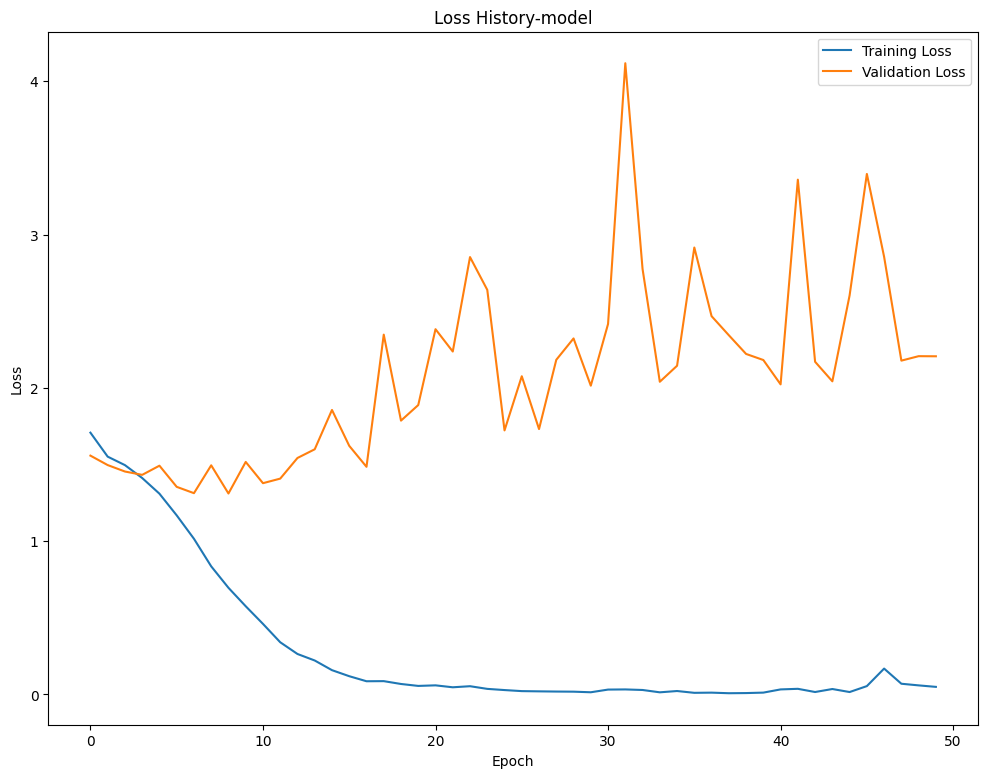

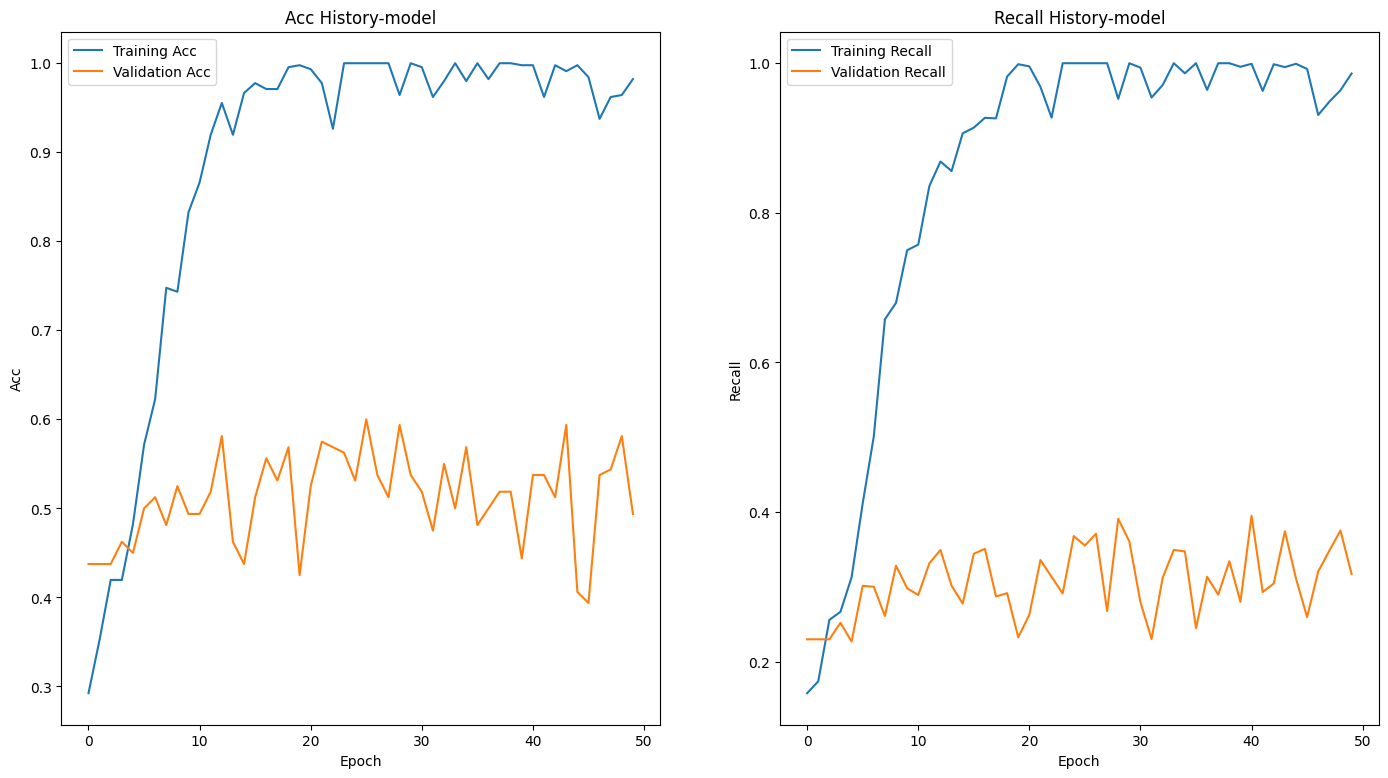

| ID | GPU | MEM |
------------------
|  0 |  7% | 15% |


In [ ]:
# Ensure your input tensor is in the correct range for CLIP


def criterion(y_pred, y_true):
    loss = nn.CrossEntropyLoss()
    return loss(y_pred, y_true)

def build_model():
    # model = smp.UnetPlusPlus(
    #     encoder_name='tu-'+seg_model ,     # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    #     encoder_weights=None,# use `imagenet` pre-trained weights for encoder initialization
    #     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    #     classes=1   ,     # model output channels (number of classes in your dataset)
    #     activation=None,
    # )
    input_dim = 512  # Размерность эмбеддингов из ResNet50
    hidden_dim = 512
    output_dim = 6  # Количество классов
    num_layers = 1
    base_model = ResNMEAN(input_dim, hidden_dim, output_dim, num_layers,dropout=0.2)
    
    base_model.to('cuda')
    return base_model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

train_dataset = MedicalDataset(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDataset(x_pth_val,y_pth_val,transform=data_transforms['valid'])
train_dataset_inv = MedicalDatasetInv(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset_inv  = MedicalDatasetInv(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_norm_inv = torch.utils.data.ConcatDataset([train_dataset, train_dataset_inv])
val_norm_inv = torch.utils.data.ConcatDataset([val_dataset, val_dataset_inv])

train_loader = DataLoader(train_norm_inv, batch_size=32,shuffle=True)
valid_loader = DataLoader(val_norm_inv, batch_size=32, shuffle=False)
for fold in range(1):
    
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                    config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                    anonymous=anonymous,
                    name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                    group=CFG.comment,
                    )
    train_loader, valid_loader = train_loader,valid_loader
    model     =   build_model()
    # unfreeze_last_n_layers(model, 2)

    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler =  fetch_scheduler(optimizer) 
    # fetch_scheduler(optimizer)
    
    model, history = run_training(model, optimizer, scheduler,
                                device=CFG.device,
                                num_epochs=CFG.epochs)
    # run.finish()
    # display(ipd.IFrame(run.url, width=1000, height=720))
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()
    torch.save(model.state_dict(), 'lstm_bs64_state_dict')
    gpus = GPUtil.getGPUs()
    gpu = gpus[0]
    GPUtil.showUtilization()
    free_memory = gpu.memoryFree
    torch.cuda.empty_cache()
    gc.collect()

In [88]:
x.shape

NameError: name 'x' is not defined

In [171]:
sum(x[0][3])

tensor([66.7576, 66.8068, 66.1186, 64.9311, 64.5055, 61.4991, 62.7603, 64.3042,
        64.9087, 65.1537, 65.0293, 64.5185, 63.9237, 63.4221, 63.0065, 62.6944,
        65.8130, 65.4683, 65.0780, 64.2809, 63.1222, 61.7345, 60.6364, 59.8486,
        59.3706, 58.9924, 58.4209, 57.9515, 58.2620, 59.9257, 62.3758, 64.7859,
        66.2447, 66.4403, 65.8768, 65.0852, 64.5600, 64.1838, 63.8684, 63.9123,
        64.0975, 64.2776, 64.3249, 64.1198, 63.8478, 61.6017, 62.1387, 63.0109,
        63.8329, 64.4669, 65.2267, 66.4179, 67.9966, 69.4159, 70.5370, 71.3763,
        74.2989, 74.6076, 68.7645, 68.4289, 68.2206, 68.5231, 65.5226, 66.3833,
        67.1045, 67.5293, 67.5486, 67.7201, 67.9394, 70.7856, 70.6909, 70.5977,
        71.0635, 75.8354, 76.9030, 77.5785, 77.4719, 76.6440, 75.7740, 75.0939,
        74.5472, 74.2327, 74.2339, 73.8697, 72.9072, 71.7038, 70.1714, 68.2807,
        66.6234, 65.1581, 63.8397, 62.5924, 61.1915, 59.7678, 58.6181, 58.0735,
        58.2384, 58.8820, 59.7752, 61.12

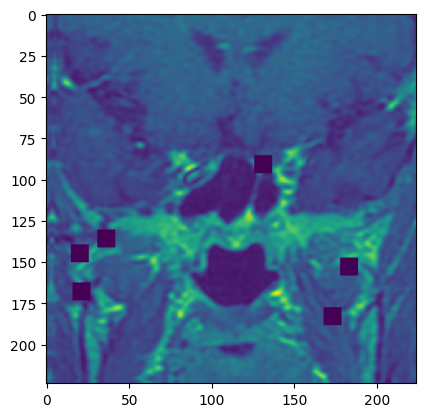

2


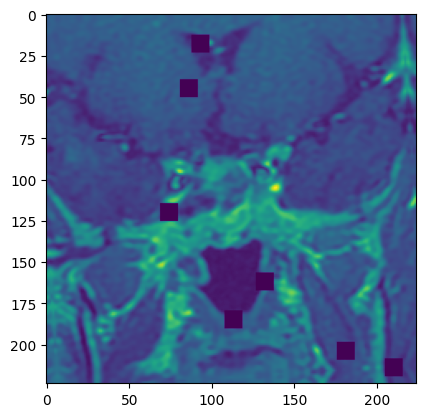

2


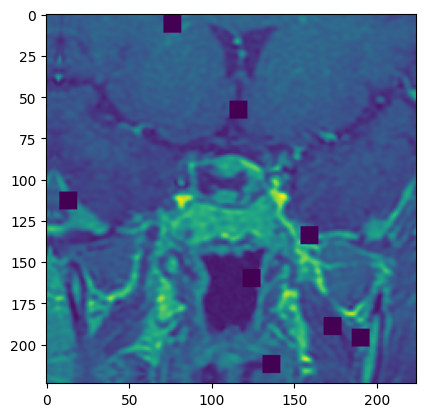

2


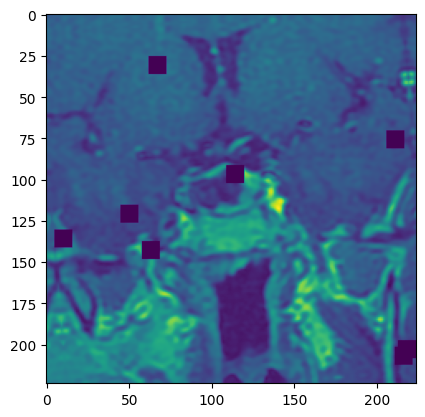

2


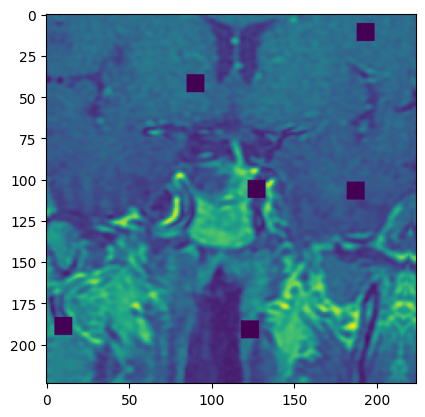

2


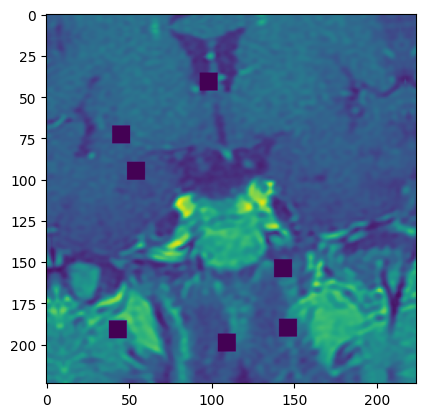

2


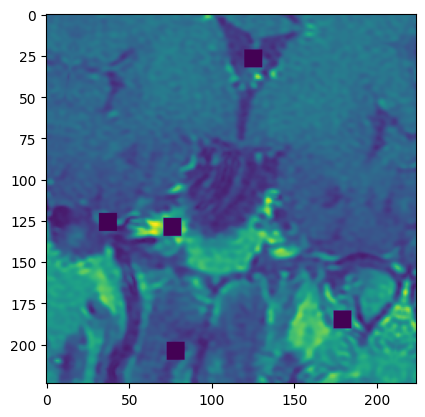

2


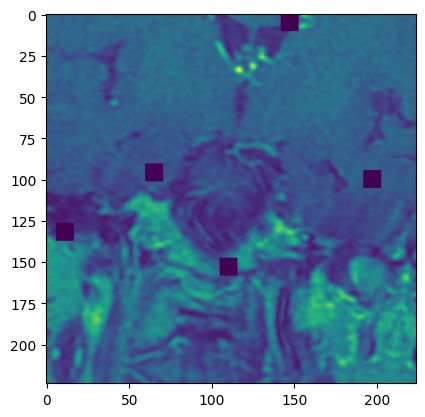

2


In [172]:
for i in range(8):
    plt.imshow(x[0][i])
    plt.show()
    print(y)

In [67]:
import GPUtil
import torch

gpus = GPUtil.getGPUs()

gpu = gpus[0]

GPUtil.showUtilization()

free_memory = gpu.memoryFree

torch.cuda.empty_cache()


| ID | GPU | MEM |
------------------
|  0 | 14% | 99% |


In [29]:
from torchvision import transforms as T

In [26]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485])
    std = np.array([0.229])
    inp = std * inp + mean
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

NameError: name 'val_dataset' is not defined

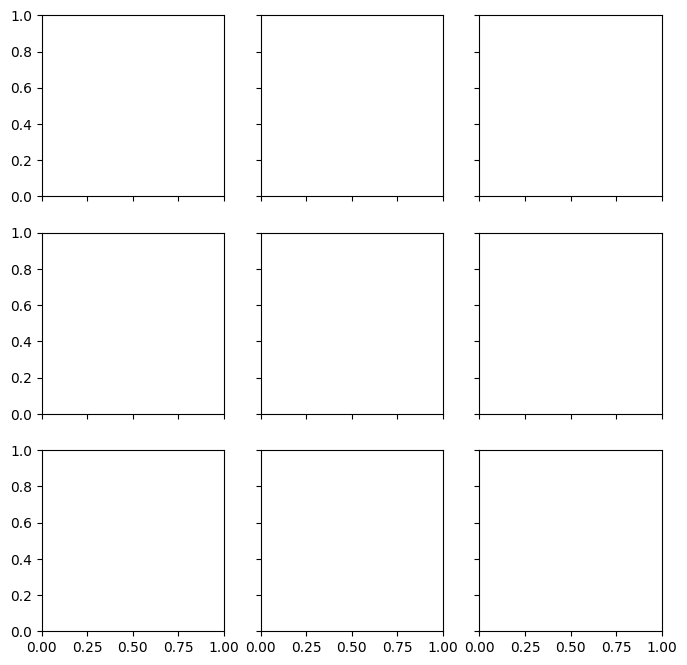

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,16))
    sample = val_dataset[random_characters]
    
    im_val, label = sample['image'],sample['labelS']
    
    imshow(im_val.data.cpu(), \
          title=label,plt_ax=fig_x)

In [28]:
DEVICE='cuda'

In [29]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    correct_predictions = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_predictions += 1
    return correct_predictions / len(y_true)



def recall_score_multiclass(y_true, y_pred, num_classes=6):
    recall = np.zeros(num_classes)
    for c in range(num_classes):
        true_positives = ((y_true == c) & (y_pred == c)).sum().item()
        possible_positives = (y_true == c).sum().item()
        recall[c] = true_positives / (possible_positives + 1e-7)
    return recall.mean()

def accuracy_score_multiclass(y_true, y_pred):
    correct_predictions = (y_true == y_pred).sum().item()
    accuracy = correct_predictions / y_true.numel()
    return accuracy

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(torch.tensor([1]),torch.tensor([1]), average='macro')
recall = recall_score(torch.tensor([1]),torch.tensor([1]), average='macro')
f1 = f1_score(torch.tensor([1,3]),torch.tensor([1,2]), average='macro')
print(precision,recall,f1)

1.0 1.0 0.3333333333333333


In [31]:
def fetch_scheduler(optimizer):
    if CFG.scheduler == 'CosineAnnealingLR':
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=CFG.T_max, 
                                                   eta_min=CFG.min_lr)
    elif CFG.scheduler == 'CosineAnnealingWarmRestarts':
        scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=CFG.T_0, 
                                                             eta_min=CFG.min_lr)
    elif CFG.scheduler == 'ReduceLROnPlateau':
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                                   mode='min',
                                                   factor=0.1,
                                                   patience=7,
                                                   threshold=0.0001,
                                                   min_lr=CFG.min_lr,)
    elif CFG.scheduer == 'ExponentialLR':
        scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.85)
    elif CFG.scheduler == None:
        return None
        
    return scheduler

In [32]:
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    model.train()
    scaler = amp.GradScaler()
    train_scores = []
    dataset_size = 0
    running_loss = 0.0
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Train ')
    for step, (sample) in pbar:  
        images, label = sample['image'], sample['labelS']
 
        images  = images.to(device).half() 
        label   = label.to(device).long() 
        batch_size = images.size(0)
        
        with amp.autocast(enabled=True):

            y_pred  = model(images)

            loss   = criterion(y_pred, label)
            loss   = loss / CFG.n_accumulate
            
        scaler.scale(loss).backward()
    
        if (step + 1) % CFG.n_accumulate == 0:
            scaler.step(optimizer)
            scaler.update()

            # zero the parameter gradients
            optimizer.zero_grad()

            if scheduler is not None:
                scheduler.step()
                
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size

        y_pred = torch.argmax(y_pred, 1)
        
        precision = precision_score(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), average='macro')
        recall = recall_score(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), average='macro')
        acc = accuracy(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
        
        train_scores.append([precision, recall, acc])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(train_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_mem=f'{mem:0.2f} GB')
        
    train_scores  = np.mean(train_scores, axis=0)    
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, train_scores

In [33]:
device='cuda'

In [34]:
@torch.no_grad()
def valid_one_epoch(model, dataloader, device, epoch):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    val_scores = []
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Valid ')
    for step, (sample) in pbar:  
        images, label = sample['image'], sample['labelS']
 
        images  = images.to(device).half() 
        label   = label.to(device).long() 
        
        batch_size = images.size(0)
        with amp.autocast(enabled=True):
            y_pred  = model(images)
        
            loss    = criterion(y_pred, label)
        
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        y_pred = torch.argmax(y_pred, 1)

        precision = precision_score(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), average='macro')
        recall = recall_score(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy(), average='macro')
        acc = accuracy(label.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
        
        val_scores.append([precision, recall, acc])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(valid_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_memory=f'{mem:0.2f} GB')
        
        
    val_scores  = np.mean(val_scores, axis=0)
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, val_scores

In [35]:
def run_training(model, optimizer, scheduler, device, num_epochs):
    # To automatically log gradients
    # wandb.watch(model, log_freq=100)
    
    if torch.cuda.is_available():
        print("cuda: {}\n".format(torch.cuda.get_device_name()))
    
    start = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc     = -np.inf
    best_epoch     = -1
    history = defaultdict(list)
    
    for epoch in range(1, num_epochs + 1): 
        gc.collect()
        print(f'Epoch {epoch}/{num_epochs}', end='')
        train_loss,train_scores = train_one_epoch(model, optimizer, scheduler, 
                                           dataloader=train_loader, 
                                           device=CFG.device, epoch=epoch)
        train_precision, train_recall, train_acc = train_scores

        print(f'Train Acc: {train_acc:0.4f} | Train Recall: {train_recall:0.4f}')

        val_loss, val_scores = valid_one_epoch(model, valid_loader, 
                                                 device=CFG.device, 
                                                 epoch=epoch)
        val_precision, val_recall, val_acc = val_scores
    
        history['Train Loss'].append(train_loss)
        history['Train Precision'].append(train_precision)
        history['Train Recall'].append(train_recall)
        history['Train Acc'].append(train_acc)

        history['Valid Loss'].append(val_loss)
        history['Valid Precision'].append(val_precision)
        history['Valid Recall'].append(val_recall)
        history['Valid Acc'].append(val_acc)
        
        
        # Log the metrics
        # wandb.log({"Train Loss": train_loss, 
        #            "Valid Loss": val_loss,
        #            "Valid Dice": val_dice,
        #            "Valid Jaccard": val_jaccard,
        #            "LR":scheduler.get_last_lr()[0]})
 
        print(f'Valid Acc: {val_acc:0.4f} | Valid Recall: {val_recall:0.4f}')
        
        # deep copy the model
        if val_acc > best_acc:
            print(f"{c_}Valid Score Improved ({best_acc:0.4f} ---> {val_acc:0.4f})")
            best_recall   = val_recall
            best_acc = val_acc
            best_precision = val_precision
            best_epoch   = epoch
            run.summary["Best Recall"]    = best_recall
            run.summary["Best Acc"] = best_acc
            run.summary["Best Precision"] = best_precision
            run.summary["Best Epoch"]   = best_epoch
            best_model_wts = copy.deepcopy(model.state_dict())
            PATH = f"best_epoch-{fold:02d}.bin"
            torch.save(model.state_dict(), PATH)
            # Save a model file from the current directory
            # wandb.save(PATH)
            print(f"Model Saved{sr_}")
            
        last_model_wts = copy.deepcopy(model.state_dict())
        PATH = f"last_epoch-{fold:02d}.bin"
        torch.save(model.state_dict(), PATH)
            
        print(); print()
    
    end = time.time()
    time_elapsed = end - start
    print('Training complete in {:.0f}h {:.0f}m {:.0f}s'.format(
        time_elapsed // 3600, (time_elapsed % 3600) // 60, (time_elapsed % 3600) % 60))
    print("Best Score: {:.4f}".format(best_acc))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, history

In [36]:
import wandb
from torchvision.models import resnet50, resnext50_32x4d,efficientnet_b6

In [37]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
print(input,target)

tensor([[-1.2203,  0.3851,  0.9266, -1.3439, -1.3151],
        [-0.1703,  0.4682,  0.5977, -1.4751, -0.5488],
        [-0.3185,  1.8235, -1.1421, -0.6591, -0.9225]], requires_grad=True) tensor([1, 4, 4])


In [38]:
data_transforms = {
    "train": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.5),
#         A.ShiftScaleRotate(shift_limit=0.0225, scale_limit=0.005, rotate_limit=10, p=1.),
#         A.OneOf([
#             A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# # #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
#             A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
#         ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=224//20, max_width=224//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=1.0),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ]
        , p=1.0),
    
    "valid": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ], p=1.0)
}

In [39]:

try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("WANDB")
    wandb.login(key=api_key)
    anonymous = None
except:
    anonymous = "must"
    print('To use your W&B account,\nGo to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. \nGet your W&B access token from here: https://wandb.ai/authorize')

To use your W&B account,
Go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. 
Get your W&B access token from here: https://wandb.ai/authorize


In [41]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

In [42]:
class CustomResNet50(nn.Module):
    def __init__(self, base_model, n_classes):
        super(CustomResNet50, self).__init__()

        self.base_model = base_model
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        
        # Step 4: Add a new fully connected layer with L2 regularization
        # Step 5: Add a dropout layer
        final_layer = list(self.base_model.children())[-1][-1]

        self.final_channels = \
                final_layer.conv3.out_channels if hasattr(final_layer, 'conv3') else final_layer.conv2.out_channels
            
        
        self.layer_attn = nn.Sequential(
                nn.Conv2d(self.final_channels, 256, 1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(inplace=True),
                nn.Conv2d(256, 1, 1, bias=False),
                nn.Sigmoid())
            
        self.fc = nn.Sequential(
            nn.Linear(2048, 2048//2),  # The input feature size 512 is specific to ResNet-18 output
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear( 2048//2, n_classes)
        )
        
        
        # Apply L2 regularization
        for param in self.fc.parameters():
            if param.dim() > 1:
                nn.init.normal_(param, std=0.01)
            else:
                nn.init.zeros_(param)
                

    def forward(self, x):
        x = self.base_model(x)
        attention = self.layer_attn(x)
        x = x * attention
            # logit
        feature = F.adaptive_avg_pool2d(x, 1).reshape(-1,self.final_channels)
        # x = self.avgpool(x)
        # x = self.flatten(x)
        x = self.fc(feature)
        return x

In [43]:
from torchvision.models import resnet50,resnet101

In [44]:
class ResNet50FeatureExtractor(nn.Module):
    def __init__(self):
        super(ResNet50FeatureExtractor, self).__init__()
        self.model = resnet101(pretrained=True)

        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        # Create a new convolutional layer with 1 input channel instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Assign the original weights to the new convolutional layerd
        self.model.conv1.weight.data = original_conv1_weight_mean

        self.model.fc = nn.Identity()

    
    def forward(self, x):
        with torch.no_grad():

            x = self.model(x)
        return  x

# Инициализация модели
feature_extractor = ResNet50FeatureExtractor()
feature_extractor.eval()
feature_extractor.to('cuda')

ResNet50FeatureExtractor(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequent

In [45]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,dropout=0.1,bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim,hidden_dim, num_layers, batch_first=True,dropout=dropout,bidirectional=bidirectional)
        self.fc1 = nn.Linear(hidden_dim*2*(2 if bidirectional else 1), hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        # c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x)
        output = self.fc1(torch.cat((out[:, -2, :], out[:, -1, :]), dim = 1))
        output = self.dropout(self.fc2(output))
        # out = self.fc(out[:, -1, :])
        return output

input_dim = 2048  # Размерность эмбеддингов из ResNet50
hidden_dim = 256
output_dim = 6  # Количество классов
num_layers = 1

In [46]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,  bidirectional=False, dropout=0.1,embedding_dim=2048):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=num_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout, batch_first=True)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        # text = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        # embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, 2048)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        # output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        # output = [sent len, batch size, hid dim * num directions]
        # output over padding tokens are zero tensors
        
        # hidden = [num layers * num directions, batch size, hid dim]
        # cell = [num layers * num directions, batch size, hid dim]
        
        # concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        # and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        output = self.fc1(hidden)
        output = self.dropout(self.fc2(output))

In [61]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\user\appdata\local\temp\pip-req-build-oblviq4_
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-oblviq4_'


In [47]:
import torch
import torch.nn as nn
import clip
from PIL import Image

In [63]:
class CLIPMEAN(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1, dropout=0.1,clip_model='ViT-B/32'):
        super(CLIPMEAN, self).__init__()

        # Load pre-trained CLIP model
        self.clip_model, _ = clip.load(clip_model)

        # Freeze CLIP model parameters
        for param in self.clip_model.parameters():
            param.requires_grad = True

        print((self.clip_model.visual.output_dim))
        # self.lstm = nn.LSTM(self.clip_model.visual.output_dim, hidden_dim, num_layers, batch_first=True,dropout=dropout,bidirectional=bidirectional)
        # self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim, hidden_dim//2),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear(hidden_dim//2, output_dim)
                                )
        # self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def preprocess_grayscale_images(self, images):
        # Convert 1-channel images to 3-channel
        images_rgb = torch.cat([images] * 3, dim=1).float()
        return images_rgb.float()
    
    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
                # batch_features = []
        # for img in images:
        #     # Поскольку batch_size=1
        #         img = torch.permute(img, (1, 0, 2,3))
        #         img = img.to('cuda').float()
                
        #         features = feature_extractor(img)
        #         batch_features.append(features)
            
        #     # Получаем эмбеддинги для всех срезов
        # patient_embedding = torch.stack(batch_features).squeeze(1)
        
        # Extract features using ResNet
        
        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.preprocess_grayscale_images(x[:, :, t, :, :])
                x_t = self.clip_model.encode_image(x_t)  # pass each frame through ResNet
                x_t = x_t.squeeze(1)
                cnn_embed_seq.append(x_t)
        
        cnn_embed_seq = torch.stack(cnn_embed_seq).squeeze(1)
        # print(cnn_embed_seq.size())
        # print(cnn_embed_seq.size())
        # cnn_embed_seq =  torch.stack(cnn_embed_seq).squeeze(1)
        
        # Pass sequence of embeddings to the LSTM
        cnn_embed_seq = torch.permute(cnn_embed_seq, (1, 0, 2))
        # print(cnn_embed_seq.size())
        # print(cnn_embed_seq.size())
        mean_cnn_embed = cnn_embed_seq.mean(dim=1)
        
        
        # Take the output of the last LSTM cell
        # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        # output = self.fc(lstm_out_last)
        
        # lstm_out, _ = self.lstm(cnn_embed_seq)
        
        # # Take the output of the last LSTM cell
        # # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        # hidden = self.dropout(mean_cnn_embed)
        output = self.fc1(mean_cnn_embed)
        # output = self.dropout(self.fc2(output))
        
        return output

In [48]:
class CLIPResNetLSTM(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1,bidirectional=False, dropout=0.1,clip_model='ViT-B/32'):
        super(CLIPResNetLSTM, self).__init__()

        # Load pre-trained CLIP model
        self.clip_model, _ = clip.load(clip_model)

        # Freeze CLIP model parameters
        for param in self.clip_model.parameters():
            param.requires_grad = True

        print((self.clip_model.visual.output_dim))
        self.lstm = nn.LSTM(self.clip_model.visual.output_dim, hidden_dim, num_layers, batch_first=True,dropout=dropout,bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim*2*(2 if bidirectional else 1), hidden_dim),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear(hidden_dim, output_dim)
                                )
        # self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def preprocess_grayscale_images(self, images):
        # Convert 1-channel images to 3-channel
        images_rgb = torch.cat([images] * 3, dim=1).float()
        return images_rgb.float()
    
    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
                # batch_features = []
        # for img in images:
        #     # Поскольку batch_size=1
        #         img = torch.permute(img, (1, 0, 2,3))
        #         img = img.to('cuda').float()
                
        #         features = feature_extractor(img)
        #         batch_features.append(features)
            
        #     # Получаем эмбеддинги для всех срезов
        # patient_embedding = torch.stack(batch_features).squeeze(1)
        
        # Extract features using ResNet
        
        cnn_embed_seq = []
        for t in range(seq_length):
            with torch.no_grad():
                x_t = self.preprocess_grayscale_images(x[:, :, t, :, :])
                x_t = self.clip_model.encode_image(x_t)  # pass each frame through ResNet
                x_t = x_t.squeeze(1)
                cnn_embed_seq.append(x_t)
        
        cnn_embed_seq = torch.stack(cnn_embed_seq).squeeze(1)
        # print(cnn_embed_seq.size())
        # print(cnn_embed_seq.size())
        # cnn_embed_seq =  torch.stack(cnn_embed_seq).squeeze(1)
        
        # Pass sequence of embeddings to the LSTM
        cnn_embed_seq = torch.permute(cnn_embed_seq, (1, 0, 2))
        # print(cnn_embed_seq.size())
        # print(cnn_embed_seq.size())
        # mean_cnn_embed = cnn_embed_seq.mean(dim=1)
        lstm_out, _ = self.lstm(cnn_embed_seq)
        
        # Take the output of the last LSTM cell
        # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        # output = self.fc(lstm_out_last)
        
        # lstm_out, _ = self.lstm(cnn_embed_seq)
        
        # # Take the output of the last LSTM cell
        # # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        hidden = self.dropout(torch.cat((lstm_out[:,-2,:], lstm_out[:,-1,:]), dim = 1))
        output = self.fc1(hidden)
        # output = self.dropout(self.fc2(output))
        
        return output

In [49]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,dropout=0.1,bidirectional=True):
        super(LSTMClassifier, self).__init__()
    
        self.model = models.resnet18(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        # Create a new convolutional layer with 1 input channel instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Assign the original weights to the new convolutional layerd
        self.model.conv1.weight.data = original_conv1_weight_mean
        self.model.fc = nn.Identity()
        # self.resnet = nn.Sequential(*list(self.model.children())[:-1])  # remove the final classification layer
        
        # Define LSTM

        self.lstm = nn.LSTM(input_dim,hidden_dim, num_layers, batch_first=True,dropout=dropout,bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*2*(2 if bidirectional else 1), hidden_dim),nn.ReLU())
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        

    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
                # batch_features = []
        # for img in images:
        #     # Поскольку batch_size=1
        #         img = torch.permute(img, (1, 0, 2,3))
        #         img = img.to('cuda').float()
                
        #         features = feature_extractor(img)
        #         batch_features.append(features)
            
        #     # Получаем эмбеддинги для всех срезов
        # patient_embedding = torch.stack(batch_features).squeeze(1)
        
        # Extract features using ResNet
        
        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                x_t = x_t.view(batch_size, -1)
                cnn_embed_seq.append(x_t)
            
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=1)
        
        # cnn_embed_seq =  torch.stack(cnn_embed_seq).squeeze(1)
        
        # Pass sequence of embeddings to the LSTM

        lstm_out, _ = self.lstm(cnn_embed_seq)
        
        # Take the output of the last LSTM cell
        # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        # output = self.fc(lstm_out_last)
        
        # lstm_out, _ = self.lstm(cnn_embed_seq)
        
        # # Take the output of the last LSTM cell
        # # lstm_out_last = lstm_out[:, -1, :]
        
        # # Pass the output through the fully connected layer
        hidden = self.dropout(torch.cat((lstm_out[:,-2,:], lstm_out[:,-1,:]), dim = 1))
        output = self.fc1(hidden)
        output = self.dropout(self.fc2(output))
        
        return output

In [50]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,dropout=0.1,bidirectional=True):
        super(LSTMClassifier, self).__init__()
    
        self.model = models.resnet18(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        # Create a new convolutional layer with 1 input channel instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Assign the original weights to the new convolutional layerd
        self.model.conv1.weight.data = original_conv1_weight_mean
        self.model.fc = nn.Identity()
        # self.resnet = nn.Sequential(*list(self.model.children())[:-1])  # remove the final classification layer
        
        # Define LSTM

        self.lstm = nn.LSTM(input_dim,hidden_dim, num_layers, batch_first=True,dropout=dropout,bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*2*(2 if bidirectional else 1), hidden_dim),nn.ReLU())
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        

    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
        
        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                x_t = x_t.view(batch_size, -1)
                cnn_embed_seq.append(x_t)
            
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=1)

        lstm_out, _ = self.lstm(cnn_embed_seq)
        hidden = self.dropout(torch.cat((lstm_out[:,-2,:], lstm_out[:,-1,:]), dim = 1))
        output = self.fc1(hidden)
        output = self.dropout(self.fc2(output))
        
        return output

In [51]:
class ResNMEAN_18(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1, dropout=0.1):
        super(ResNMEAN_18, self).__init__()

        # Load pre-trained CLIP model        
        self.model_sag = models.resnet18(pretrained=True)
        original_conv1_weight_sag = self.model_sag.conv1.weight.data
        original_conv1_weight_mean_sag = original_conv1_weight_sag.mean(dim=1, keepdim=True)
        self.model_sag.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model_sag.conv1.weight.data = original_conv1_weight_mean_sag
        self.model_sag.fc = nn.Identity()
        # self.mdoel_ax = models.resnet18(pretrained=True)
        # original_conv1_weight_ax = self.model_ax.conv1.weight.data
        # original_conv1_weight_mean_ax = original_conv1_weight_ax.mean(dim=1, keepdim=True)
        # self.model_ax.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # self.model_ax.conv1.weight.data = original_conv1_weight_mean_ax

        self.model = models.resnet50(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        # Create a new convolutional layer with 1 input channel instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Assign the original weights to the new convolutional layerd
        self.model.conv1.weight.data = original_conv1_weight_mean
        self.model.fc = nn.Identity()

        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim*5, (hidden_dim*5)//2),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear((hidden_dim*5)//2, output_dim)
                                )
        # self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def preprocess_grayscale_images(self, images):
        # Convert 1-channel images to 3-channel
        images_rgb = torch.cat([images] * 3, dim=1).float()
        return images_rgb.float()
    
    def forward(self, x,y):
        batch_size, c, seq_length,  h, w = x.shape

        cnn_embed_seq_x = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                x_t = x_t.view(batch_size, -1)
                cnn_embed_seq_x.append(x_t)

        batch_size, c, seq_length,  h, w = y.shape
        cnn_embed_seq_y = []
        for t in range(seq_length):
            # with torch.no_grad():
                y_t = self.model_sag(y[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                y_t = y_t.view(batch_size, -1)
                cnn_embed_seq_y.append(y_t)

        # batch_size, c, seq_length,  h, w = z.shape
        # cnn_embed_seq_z = []
        # for t in range(seq_length):
        #     # with torch.no_grad():
        #         x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
        #         x_t = x_t.view(batch_size, -1)
        #         cnn_embed_seq_z.append(x_t)


        weights = torch.tensor([0.05, 0.5, 0.1, 0.1, 0.15, 0.15, 0.1, 0.2, 0.05, 0.05])

        # Убедитесь, что веса суммируются к 1, по желанию это можно нормализовать
       
 
        # Расширение весового вектора до размера [1, 10, 1] для правильного перемножения
        weights = weights.view(1, -1, 1).to('cuda')
        
        cnn_embed_seq_x = torch.stack(cnn_embed_seq_x, dim=1)
        cnn_embed_seq_y = torch.stack(cnn_embed_seq_y, dim=1)
        # Умножение на весовой вектор и взвешенное суммирование
        cnn_embed_seq_x_w = cnn_embed_seq_x * weights  # [30, 10, 512]
        cnn_embed_seq_y_w = cnn_embed_seq_y * weights 

        # cnn_embed_seq_z = torch.stack(cnn_embed_seq_z, dim=1)

        cnn_embed_seq_list = [
        cnn_embed_seq_x_w.mean(dim=1),  # Размер (10, 512)
        cnn_embed_seq_y_w.mean(dim=1),  # Размер (10, 512)
        ]
        
        cnn_embed_combined_mean = torch.cat(cnn_embed_seq_list, dim=1)
       
        output = self.fc1(cnn_embed_combined_mean)
        
        return output

In [110]:
class ResNMEAN(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1, dropout=0.1):
        super(ResNMEAN, self).__init__()

        # Load pre-trained CLIP model

        self.model = models.resnet50(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model.conv1.weight.data = original_conv1_weight_mean
        
        self.model.fc = nn.Identity()
        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim, hidden_dim//2),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear(hidden_dim//2, output_dim),
                                )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                x_t = x_t.view(batch_size, -1)
                cnn_embed_seq.append(x_t)
            
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=1)
        mean_cnn_embed = cnn_embed_seq.mean(dim=1)
        output = self.fc1(mean_cnn_embed)
        
        
        return output

In [53]:
model = models.resnet50(pretrained=True)
# for param in resnet.parameters():
#     param.requires_grad = False
original_conv1_weight = model.conv1.weight.data
original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
# Create a new convolutional layer with 1 input channel instead of 3
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# Assign the original weights to the new convolutional layerd
model.conv1.weight.data = original_conv1_weight_mean

avgpool = nn.AdaptiveAvgPool2d((1, 1))
flatten = nn.Flatten()

# Step 4: Add a new fully connected layer with L2 regularization# Step 5: Add a dropout layer
final_layer = list(model.children())[-1][-1]

        # self.final_channels = \
        #         self.final_layer.conv3.out_channels if hasattr(self.final_layer, 'conv3') else self.final_layer.conv2.out_channels
print(final_layer)    

TypeError: 'Linear' object is not subscriptable

In [54]:
class ResNetAttMEAN(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1, dropout=0.1):
        super(ResNetAttMEAN, self).__init__()

        # Load pre-trained CLIP model

        self.model = models.resnet50(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        # Create a new convolutional layer with 1 input channel instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Assign the original weights to the new convolutional layerd
        self.model.conv1.weight.data = original_conv1_weight_mean
        modules = list(self.model.children())[:-2]
        self.model = nn.Sequential(*modules)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        
        # Step 4: Add a new fully connected layer with L2 regularization
        # Step 5: Add a dropout layer
        self.final_layer = list(self.model.children())[-1][-1]

        self.final_channels = \
                self.final_layer.conv3.out_channels if hasattr(self.final_layer, 'conv3') else self.final_layer.conv2.out_channels
            
        
        self.layer_attn = nn.Sequential(
                nn.Conv2d(self.final_channels, 256, 1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(inplace=True),
                nn.Conv2d(256, 1, 1, bias=False),
                nn.Sigmoid())
        

        
        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim, hidden_dim//2),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear(hidden_dim//2, output_dim)
                                )
        self.dropout = nn.Dropout(dropout)
       
        
        # # Apply L2 regularization
        # for param in self.fc.parameters():
        #     if param.dim() > 1:
        #         nn.init.normal_(param, std=0.01)
        #     else:
        #         nn.init.zeros_(param)
                


    def preprocess_grayscale_images(self, images):
 
        images_rgb = torch.cat([images] * 3, dim=1).float()
        return images_rgb.float()
    
    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape

        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float()) 
                attention = self.layer_attn(x_t)
                x_t = x_t * attention
                feature = F.adaptive_avg_pool2d(x_t, 1).reshape(-1,self.final_channels)
                # x_t = x_t.view(batch_size, -1)
                cnn_embed_seq.append(feature)
            
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=1)
        mean_cnn_embed = cnn_embed_seq.mean(dim=1)
        output = self.fc1(mean_cnn_embed)
        
        
        return output

In [834]:
train_dataset = MedicalDataset(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDataset(x_pth_val,y_pth_val,transform=data_transforms['valid'])
train_dataset_inv = MedicalDatasetInv(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset_inv  = MedicalDatasetInv(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_norm_inv = torch.utils.data.ConcatDataset([train_dataset, train_dataset_inv])
val_norm_inv = torch.utils.data.ConcatDataset([val_dataset, val_dataset_inv])

In [55]:
class CFG:
    seed          = 42
    debug         = False # set debug=False for Full Training
    exp_name      = 'Baselinev2'
    comment       = 'unet-efficientnet_b1-224x224-aug2-split2'
    model_name    = 'Eff'
    backbone      = 'efficientnet-b1'
    train_bs      = 128
    valid_bs      = train_bs*2
    img_size      = [224, 224]
    epochs        = 50
    lr            = 1e-4
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 1e-6
    T_max         = int(30000/train_bs*epochs)+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-6
    n_accumulate  = max(1, 32//train_bs)
    n_fold        = 5
    num_classes   = 6
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [58]:
data_transforms = {
    "train": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        # A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        # A.ShiftScaleRotate(shift_limit=0.0225, scale_limit=0.005, rotate_limit=10, p=1.),
#         A.OneOf([
#             A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# # #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
#             A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
#         ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=224//20, max_width=224//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=1.0),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ]
        , p=1.0),
    
    "valid": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ], p=1.0)
}

In [74]:
def unfreeze_last_n_layers(model, n):
    layers = list(model.children())
    
    # Get the last n layers
    for layer in layers[-n:]:
        for param in layer.parameters():
            param.requires_grad = True

###############
### Fold: 0
###############


cuda: NVIDIA GeForce RTX 3090

Epoch 1/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=4.88 GB, lr=0.00010, train_loss=1.7074]


Train Acc: 0.2924 | Train Recall: 0.1579


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.06 GB, lr=0.00010, valid_loss=1.5575]


Valid Acc: 0.4375 | Valid Recall: 0.2300
Valid Score Improved (-inf ---> 0.4375)
Model Saved


Epoch 2/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.5511]


Train Acc: 0.3527 | Train Recall: 0.1738


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.98it/s, gpu_memory=1.08 GB, lr=0.00010, valid_loss=1.4960]


Valid Acc: 0.4375 | Valid Recall: 0.2300


Epoch 3/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=1.4957]


Train Acc: 0.4196 | Train Recall: 0.2559


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.4539]


Valid Acc: 0.4375 | Valid Recall: 0.2300


Epoch 4/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.4116]


Train Acc: 0.4196 | Train Recall: 0.2668


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4322]


Valid Acc: 0.4625 | Valid Recall: 0.2520
Valid Score Improved (0.4375 ---> 0.4625)
Model Saved


Epoch 5/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.3093]


Train Acc: 0.4821 | Train Recall: 0.3128


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.90it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.4920]


Valid Acc: 0.4500 | Valid Recall: 0.2270


Epoch 6/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=1.1680]


Train Acc: 0.5714 | Train Recall: 0.4116


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.3540]


Valid Acc: 0.5000 | Valid Recall: 0.3015
Valid Score Improved (0.4625 ---> 0.5000)
Model Saved


Epoch 7/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=1.0152]


Train Acc: 0.6228 | Train Recall: 0.5012


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.3127]


Valid Acc: 0.5125 | Valid Recall: 0.3002
Valid Score Improved (0.5000 ---> 0.5125)
Model Saved


Epoch 8/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.8353]


Train Acc: 0.7478 | Train Recall: 0.6577


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4944]


Valid Acc: 0.4813 | Valid Recall: 0.2612


Epoch 9/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.6954]


Train Acc: 0.7433 | Train Recall: 0.6797


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.3106]


Valid Acc: 0.5250 | Valid Recall: 0.3284
Valid Score Improved (0.5125 ---> 0.5250)
Model Saved


Epoch 10/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.5751]


Train Acc: 0.8326 | Train Recall: 0.7500


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.5165]


Valid Acc: 0.4938 | Valid Recall: 0.2982


Epoch 11/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.4600]


Train Acc: 0.8661 | Train Recall: 0.7575


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.3779]


Valid Acc: 0.4938 | Valid Recall: 0.2891


Epoch 12/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.3402]


Train Acc: 0.9196 | Train Recall: 0.8357


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4077]


Valid Acc: 0.5188 | Valid Recall: 0.3315


Epoch 13/50

Train : 100%|██████████| 14/14 [00:11<00:00,  1.25it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.2636]


Train Acc: 0.9554 | Train Recall: 0.8686


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=1.5423]


Valid Acc: 0.5813 | Valid Recall: 0.3494
Valid Score Improved (0.5250 ---> 0.5813)
Model Saved


Epoch 14/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.2211]


Train Acc: 0.9196 | Train Recall: 0.8559


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.92it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.5990]


Valid Acc: 0.4625 | Valid Recall: 0.3017


Epoch 15/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1581]


Train Acc: 0.9665 | Train Recall: 0.9063


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.89it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.8556]


Valid Acc: 0.4375 | Valid Recall: 0.2777


Epoch 16/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1187]


Train Acc: 0.9777 | Train Recall: 0.9139


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.6215]


Valid Acc: 0.5125 | Valid Recall: 0.3443


Epoch 17/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.28it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0858]


Train Acc: 0.9710 | Train Recall: 0.9270


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.4847]


Valid Acc: 0.5563 | Valid Recall: 0.3509


Epoch 18/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0865]


Train Acc: 0.9710 | Train Recall: 0.9263


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3468]


Valid Acc: 0.5312 | Valid Recall: 0.2873


Epoch 19/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0679]


Train Acc: 0.9955 | Train Recall: 0.9821


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7860]


Valid Acc: 0.5687 | Valid Recall: 0.2917


Epoch 20/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0553]


Train Acc: 0.9978 | Train Recall: 0.9987


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.8876]


Valid Acc: 0.4250 | Valid Recall: 0.2326


Epoch 21/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0590]


Train Acc: 0.9933 | Train Recall: 0.9958


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3824]


Valid Acc: 0.5250 | Valid Recall: 0.2628


Epoch 22/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0464]


Train Acc: 0.9777 | Train Recall: 0.9684


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2367]


Valid Acc: 0.5750 | Valid Recall: 0.3360


Epoch 23/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0534]


Train Acc: 0.9263 | Train Recall: 0.9272


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.8529]


Valid Acc: 0.5687 | Valid Recall: 0.3135


Epoch 24/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0360]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.6391]


Valid Acc: 0.5625 | Valid Recall: 0.2913


Epoch 25/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.35it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0283]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7222]


Valid Acc: 0.5312 | Valid Recall: 0.3680


Epoch 26/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0214]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.0755]


Valid Acc: 0.6000 | Valid Recall: 0.3553
Valid Score Improved (0.5813 ---> 0.6000)
Model Saved


Epoch 27/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0198]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=1.7309]


Valid Acc: 0.5375 | Valid Recall: 0.3711


Epoch 28/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0186]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.90it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1827]


Valid Acc: 0.5125 | Valid Recall: 0.2679


Epoch 29/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0178]


Train Acc: 0.9643 | Train Recall: 0.9524


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.3221]


Valid Acc: 0.5938 | Valid Recall: 0.3911


Epoch 30/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0139]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.80it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0140]


Valid Acc: 0.5375 | Valid Recall: 0.3607


Epoch 31/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0314]


Train Acc: 0.9955 | Train Recall: 0.9940


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.4163]


Valid Acc: 0.5188 | Valid Recall: 0.2796


Epoch 32/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0324]


Train Acc: 0.9621 | Train Recall: 0.9542


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=4.1175]


Valid Acc: 0.4750 | Valid Recall: 0.2303


Epoch 33/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0288]


Train Acc: 0.9799 | Train Recall: 0.9708


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.7753]


Valid Acc: 0.5500 | Valid Recall: 0.3123


Epoch 34/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0135]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0395]


Valid Acc: 0.5000 | Valid Recall: 0.3495


Epoch 35/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0220]


Train Acc: 0.9799 | Train Recall: 0.9865


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.82it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.1440]


Valid Acc: 0.5687 | Valid Recall: 0.3474


Epoch 36/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0102]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.9153]


Valid Acc: 0.4813 | Valid Recall: 0.2448


Epoch 37/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0114]


Train Acc: 0.9821 | Train Recall: 0.9643


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.97it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.4674]


Valid Acc: 0.5000 | Valid Recall: 0.3136


Epoch 38/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0077]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.94it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.3431]


Valid Acc: 0.5188 | Valid Recall: 0.2896


Epoch 39/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0086]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2210]


Valid Acc: 0.5188 | Valid Recall: 0.3344


Epoch 40/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.31it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0116]


Train Acc: 0.9978 | Train Recall: 0.9952


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.87it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1814]


Valid Acc: 0.4437 | Valid Recall: 0.2801


Epoch 41/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0325]


Train Acc: 0.9978 | Train Recall: 0.9992


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.0225]


Valid Acc: 0.5375 | Valid Recall: 0.3952


Epoch 42/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.29it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0364]


Train Acc: 0.9621 | Train Recall: 0.9630


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=3.3579]


Valid Acc: 0.5375 | Valid Recall: 0.2931


Epoch 43/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.27it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0155]


Train Acc: 0.9978 | Train Recall: 0.9987


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.72it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.1699]


Valid Acc: 0.5125 | Valid Recall: 0.3046


Epoch 44/50

Train : 100%|██████████| 14/14 [00:11<00:00,  1.26it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0351]


Train Acc: 0.9911 | Train Recall: 0.9948


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.0424]


Valid Acc: 0.5938 | Valid Recall: 0.3744


Epoch 45/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0154]


Train Acc: 0.9978 | Train Recall: 0.9992


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.96it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.6032]


Valid Acc: 0.4062 | Valid Recall: 0.3112


Epoch 46/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.34it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0541]


Train Acc: 0.9844 | Train Recall: 0.9924


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=3.3953]


Valid Acc: 0.3937 | Valid Recall: 0.2596


Epoch 47/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.30it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.1684]


Train Acc: 0.9375 | Train Recall: 0.9308


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.93it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.8544]


Valid Acc: 0.5375 | Valid Recall: 0.3207


Epoch 48/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.33it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0695]


Train Acc: 0.9621 | Train Recall: 0.9486


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.86it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.1773]


Valid Acc: 0.5437 | Valid Recall: 0.3484


Epoch 49/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.04 GB, lr=0.00010, train_loss=0.0588]


Train Acc: 0.9643 | Train Recall: 0.9638


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.95it/s, gpu_memory=1.09 GB, lr=0.00010, valid_loss=2.2064]


Valid Acc: 0.5813 | Valid Recall: 0.3754


Epoch 50/50

Train : 100%|██████████| 14/14 [00:10<00:00,  1.32it/s, gpu_mem=5.05 GB, lr=0.00010, train_loss=0.0491]


Train Acc: 0.9821 | Train Recall: 0.9862


Valid : 100%|██████████| 5/5 [00:02<00:00,  1.91it/s, gpu_memory=1.11 GB, lr=0.00010, valid_loss=2.2057]


Valid Acc: 0.4938 | Valid Recall: 0.3174


Training complete in 0h 11m 25s
Best Score: 0.6000


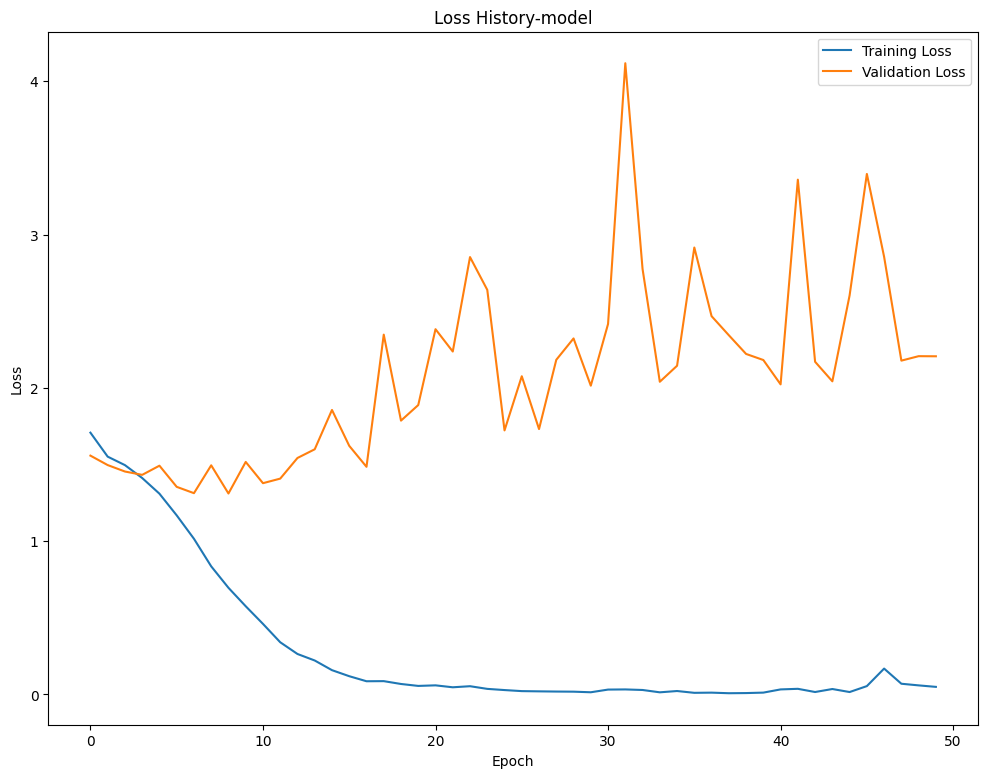

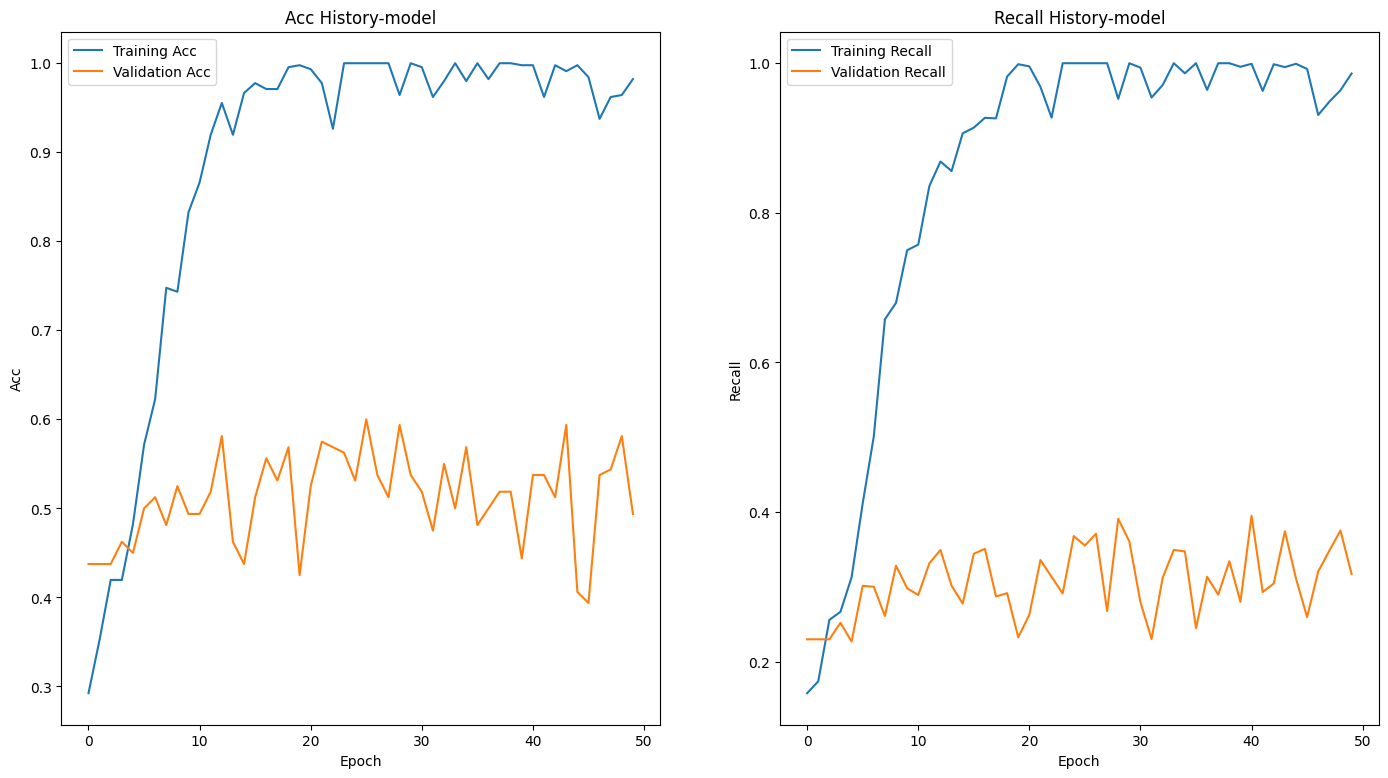

| ID | GPU | MEM |
------------------
|  0 |  7% | 15% |


In [77]:
# Ensure your input tensor is in the correct range for CLIP


def criterion(y_pred, y_true):
    loss = nn.CrossEntropyLoss()
    return loss(y_pred, y_true)

def build_model():
    # model = smp.UnetPlusPlus(
    #     encoder_name='tu-'+seg_model ,     # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    #     encoder_weights=None,# use `imagenet` pre-trained weights for encoder initialization
    #     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    #     classes=1   ,     # model output channels (number of classes in your dataset)
    #     activation=None,
    # )
    input_dim = 512  # Размерность эмбеддингов из ResNet50
    hidden_dim = 512
    output_dim = 6  # Количество классов
    num_layers = 1
    base_model = ResNMEAN(input_dim, hidden_dim, output_dim, num_layers,dropout=0.2)
    
    base_model.to('cuda')
    return base_model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

train_dataset = MedicalDataset(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDataset(x_pth_val,y_pth_val,transform=data_transforms['valid'])
train_dataset_inv = MedicalDatasetInv(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset_inv  = MedicalDatasetInv(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_norm_inv = torch.utils.data.ConcatDataset([train_dataset, train_dataset_inv])
val_norm_inv = torch.utils.data.ConcatDataset([val_dataset, val_dataset_inv])

train_loader = DataLoader(train_norm_inv, batch_size=32,shuffle=True)
valid_loader = DataLoader(val_norm_inv, batch_size=32, shuffle=False)
for fold in range(1):
    
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                    config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                    anonymous=anonymous,
                    name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                    group=CFG.comment,
                    )
    train_loader, valid_loader = train_loader,valid_loader
    model     =   build_model()
    # unfreeze_last_n_layers(model, 2)

    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler =  fetch_scheduler(optimizer) 
    # fetch_scheduler(optimizer)
    
    model, history = run_training(model, optimizer, scheduler,
                                device=CFG.device,
                                num_epochs=CFG.epochs)
    # run.finish()
    # display(ipd.IFrame(run.url, width=1000, height=720))
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()
    torch.save(model.state_dict(), 'lstm_bs64_state_dict')
    gpus = GPUtil.getGPUs()
    gpu = gpus[0]
    GPUtil.showUtilization()
    free_memory = gpu.memoryFree
    torch.cuda.empty_cache()
    gc.collect()

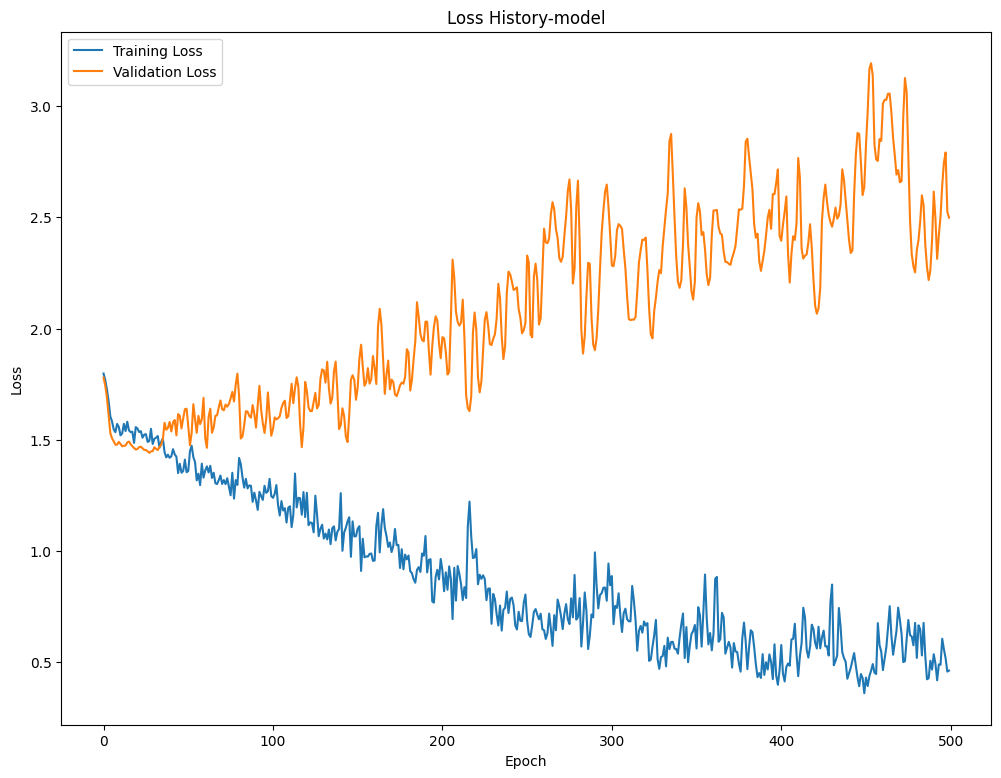

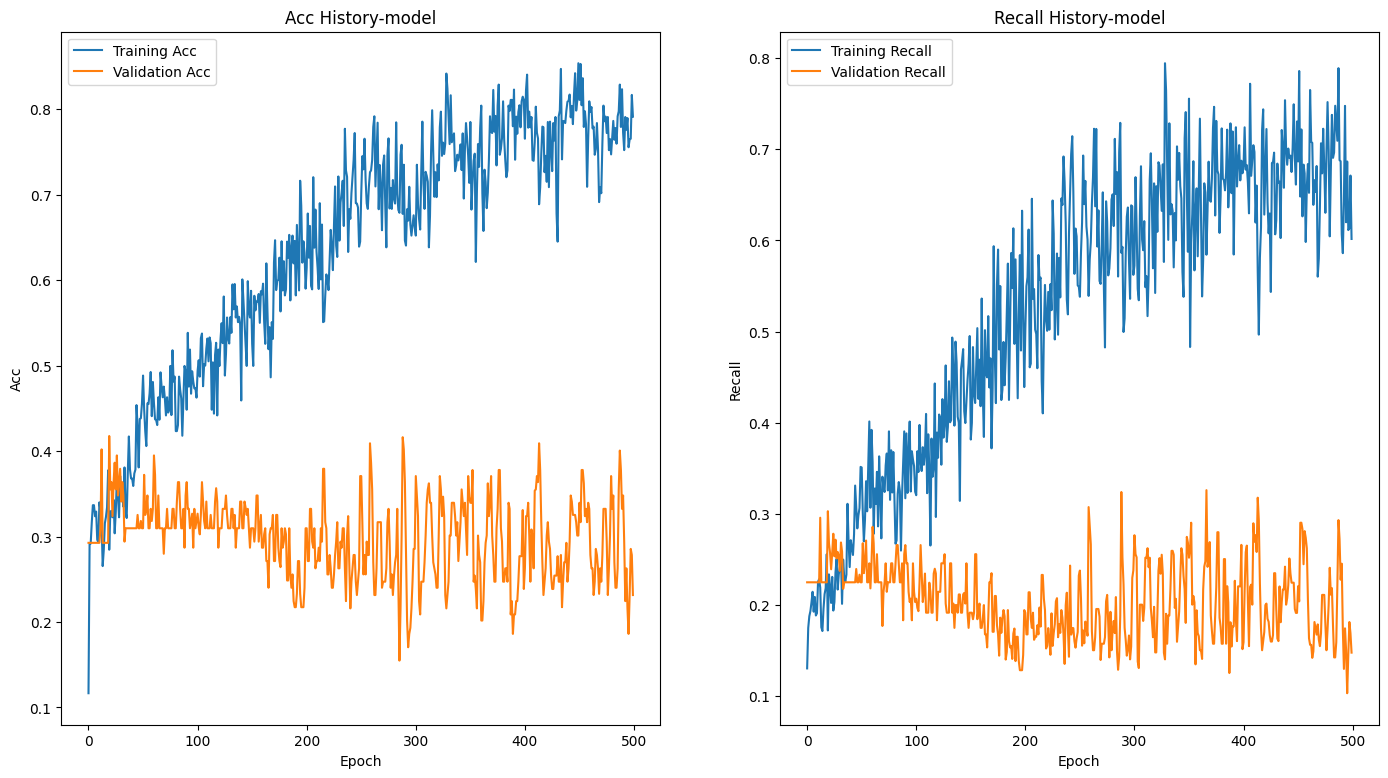

In [658]:
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()

In [663]:

valid_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
12 12
32 32
32 32
32 32
8 8
460 460


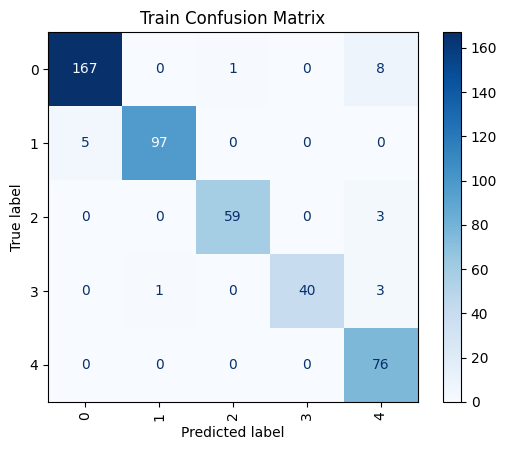

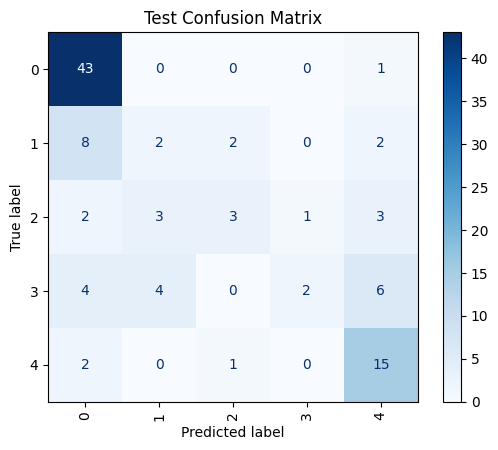

In [153]:
import os
device = 'cuda'

def get_predictions(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for step, (sample) in enumerate(loader):  
            
            images, label = sample['image'], sample['labelS']
    
            images  = images.to(device).half() 
            label   = label.to(device).long() 
            print(len(label),len(images))
            batch_size = images.size(0)
            # batch_features = []
            # for img in images:
            #     # Поскольку batch_size=1
            #         img = torch.permute(img, (1, 0, 2,3))
            #         img = img.to('cuda').float()
                    
            #         features = feature_extractor(img)
            #         batch_features.append(features)
                
            #     # Получаем эмбеддинги для всех срезов
            # patient_embedding = torch.stack(batch_features).squeeze(1)
            with amp.autocast(enabled=True):
                outputs = model(images)
             
            if (len(images))==16: 
                print(outputs.size())
                print(torch.max(outputs,1))

            _,preds = torch.max(outputs,1 )
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
    return all_preds, all_labels

# Получение предсказаний для тренировочного и тестового наборов
train_preds, train_labels = get_predictions(model, train_loader)
test_preds, test_labels = get_predictions(model, valid_loader)
print(len(train_preds),len(train_labels))
      # Функция для отрисовки матрицы путаницы
def plot_confusion_matrix(preds, labels,filename,title='Confusion Matrix'):
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(title)
    plt.savefig(filename)
    plt.show()

# Отрисовка матрицы путаницы для тренировочного и тестового наборов

plot_confusion_matrix(train_preds, train_labels,  title='Train Confusion Matrix',filename=os.path.join('output', 'train_confusion_matrix.png'))
plot_confusion_matrix(test_preds, test_labels, title='Test Confusion Matrix',filename=os.path.join('output', 'val_confusion_matrix.png'))


In [123]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(train_preds, train_labels))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       172
           1       0.95      0.99      0.97        98
           2       0.95      0.98      0.97        60
           3       0.91      1.00      0.95        40
           4       1.00      0.84      0.92        90

    accuracy                           0.95       460
   macro avg       0.95      0.96      0.95       460
weighted avg       0.96      0.95      0.95       460



In [155]:
print(classification_report(test_preds, test_labels))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83        59
           1       0.14      0.22      0.17         9
           2       0.25      0.50      0.33         6
           3       0.12      0.67      0.21         3
           4       0.83      0.56      0.67        27

    accuracy                           0.62       104
   macro avg       0.47      0.53      0.44       104
weighted avg       0.80      0.62      0.69       104



In [214]:


# Пример данных
cnn_embed_seq_x = torch.randn(10, 16, 512)  # Пример тензора
cnn_embed_seq_y = torch.randn(10, 16, 512)  # Пример тензора

# Применение torch.stack не нужно, если уже работают с тензорами
cnn_embed_seq_list = [
    cnn_embed_seq_x.mean(dim=1),  # Размер (10, 512)
    cnn_embed_seq_y.mean(dim=1),  # Размер (10, 512)
]

print(cnn_embed_seq_list[0].size())  # Проверка размера для отладки
print(cnn_embed_seq_list[1].size())  # Проверка размера для отладки

# Используем tuple или list для передачи нескольких тензоров в torch.cat
cnn_embed_combined_mean = torch.cat(cnn_embed_seq_list, dim=1)
print(cnn_embed_combined_mean.size())  # Проверка размера для отладки

torch.Size([10, 512])
torch.Size([10, 512])
torch.Size([10, 1024])


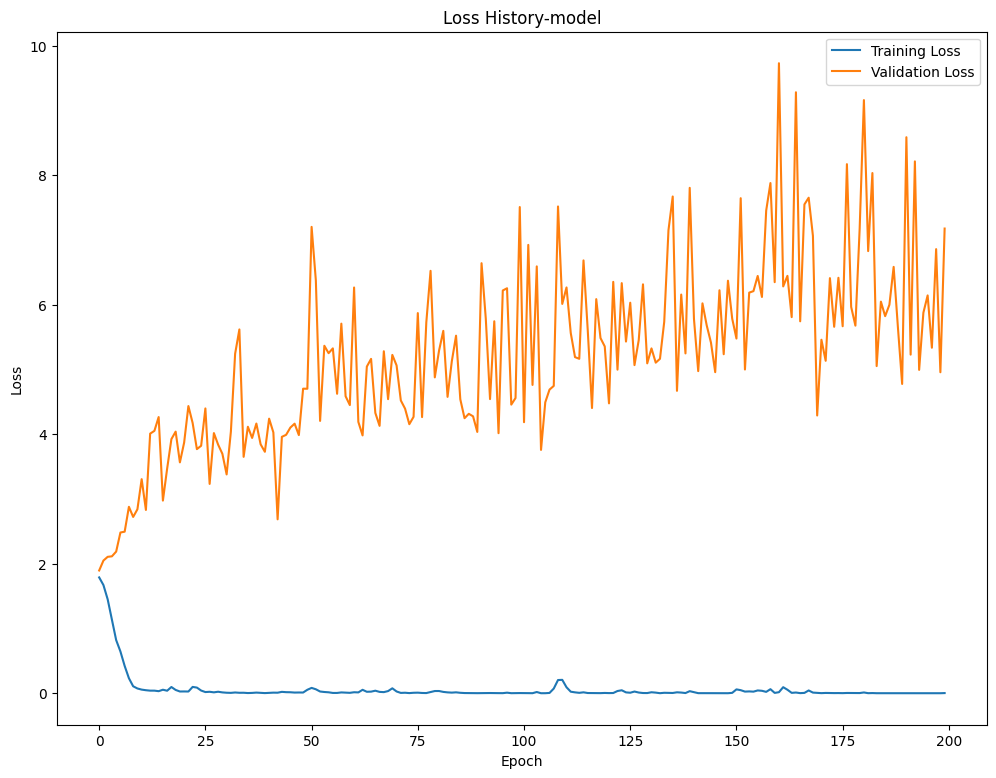

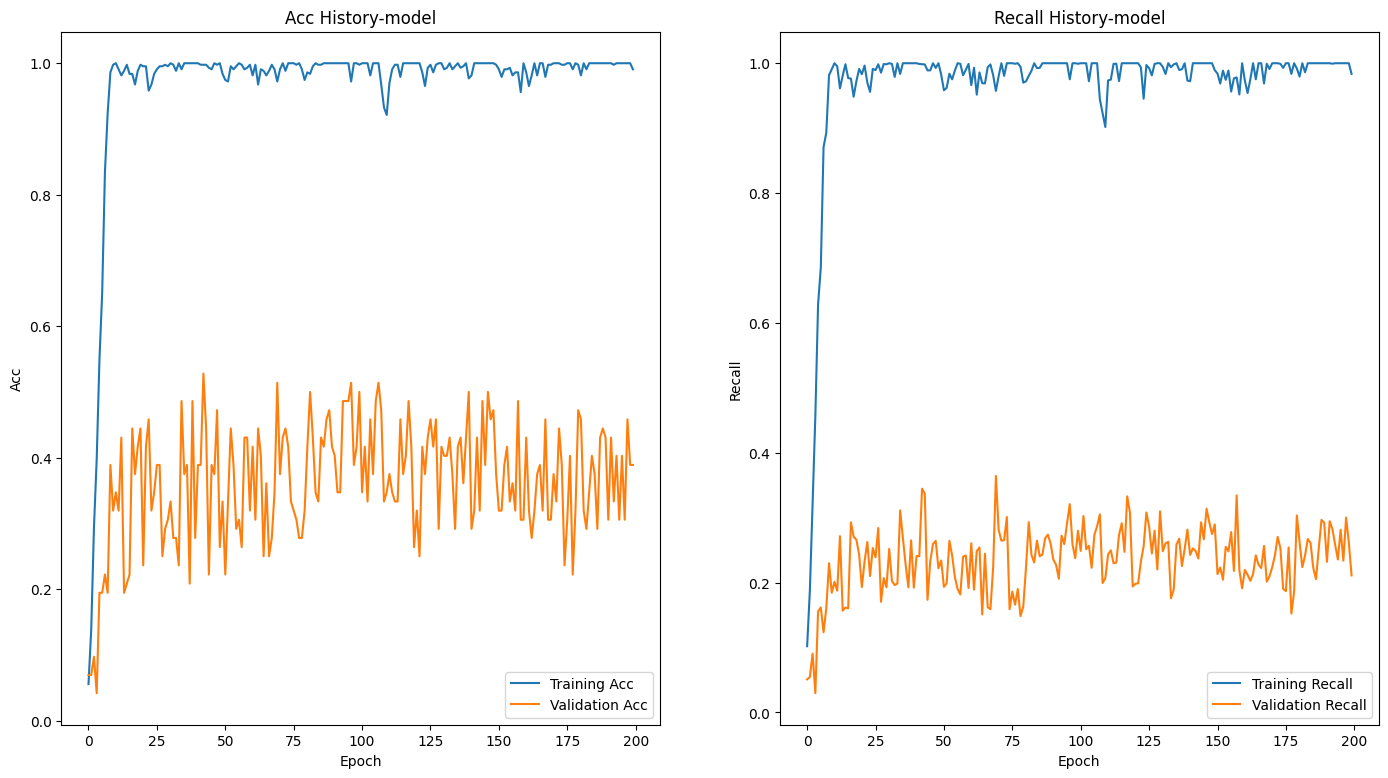

In [281]:
plt.figure(figsize=(12,9))

plt.plot(history['Train Loss'], label=f'Training Loss')
plt.plot(history['Valid Loss'], label=f'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss History-model')


plt.figure(figsize=(17,9))
plt.subplot(1, 2, 1)
plt.plot(history['Train Acc'], label=f'Training Acc')
plt.plot(history['Valid Acc'], label=f'Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.title(f'Acc History-model')

plt.subplot(1, 2, 2)
plt.plot(history['Train Recall'], label=f'Training Recall')
plt.plot(history['Valid Recall'], label=f'Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title(f'Recall History-model')
plt.show()

In [327]:
x_pth ,y_pth = get_pathes('data_08_06_24_cls141_seg105')

In [113]:
data_transforms = {
    "train": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.0225, scale_limit=0.005, rotate_limit=10, p=1.),
#         A.OneOf([
#             A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# # #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
#             A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
#         ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=224//20, max_width=224//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=1.0),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ]
        , p=1.0),
    
    "valid": A.Compose([
        A.augmentations.crops.transforms.CenterCrop(224,224),
        A.Resize(224,224, interpolation=cv2.INTER_NEAREST),
        A.augmentations.Normalize(mean=(0.485, ), std=(0.229, )),
        ], p=1.0)
}

In [133]:
class CFG:
    seed          = 42
    debug         = False # set debug=False for Full Training
    exp_name      = 'Baselinev2'
    comment       = 'unet-efficientnet_b1-224x224-aug2-split2'
    model_name    = 'Eff'
    backbone      = 'efficientnet-b1'
    train_bs      = 128
    valid_bs      = train_bs*2
    img_size      = [224, 224]
    epochs        = 50
    lr            = 2e-4
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 1e-6
    T_max         = int(30000/train_bs*epochs)+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-5
    n_accumulate  = max(1, 32//train_bs)
    n_fold        = 5
    num_classes   = 6
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [160]:
[print(len(x)) for x in [x_pth_train,y_pth_train,x_pth_val,y_pth_val]]

230
230
52
52


[None, None, None, None]

In [161]:
230+52

282

###############
### Fold: 0
###############


cuda: NVIDIA GeForce RTX 3090

Epoch 1/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=1.5319]


Train Acc: 0.3839 | Train Recall: 0.2231


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.62it/s, gpu_memory=3.42 GB, lr=0.00020, valid_loss=1.5104]


Valid Acc: 0.3141 | Valid Recall: 0.2625
Valid Score Improved (-inf ---> 0.3141)
Model Saved


Epoch 2/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=1.4602]


Train Acc: 0.3705 | Train Recall: 0.2438


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.64it/s, gpu_memory=3.43 GB, lr=0.00020, valid_loss=1.5006]


Valid Acc: 0.4359 | Valid Recall: 0.2417
Valid Score Improved (0.3141 ---> 0.4359)
Model Saved


Epoch 3/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=1.2951]


Train Acc: 0.4643 | Train Recall: 0.3166


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.65it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.3709]


Valid Acc: 0.4469 | Valid Recall: 0.3544
Valid Score Improved (0.4359 ---> 0.4469)
Model Saved


Epoch 4/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=1.1005]


Train Acc: 0.5335 | Train Recall: 0.4884


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.64it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.2204]


Valid Acc: 0.5734 | Valid Recall: 0.4289
Valid Score Improved (0.4469 ---> 0.5734)
Model Saved


Epoch 5/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=0.8679]


Train Acc: 0.6607 | Train Recall: 0.5827


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.67it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.6495]


Valid Acc: 0.5344 | Valid Recall: 0.3864


Epoch 6/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.7737]


Train Acc: 0.6897 | Train Recall: 0.6379


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.65it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.5253]


Valid Acc: 0.4781 | Valid Recall: 0.3176


Epoch 7/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=0.6424]


Train Acc: 0.7589 | Train Recall: 0.7258


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.63it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.5389]


Valid Acc: 0.6141 | Valid Recall: 0.5093
Valid Score Improved (0.5734 ---> 0.6141)
Model Saved


Epoch 8/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.4334]


Train Acc: 0.8438 | Train Recall: 0.8287


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.64it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.6770]


Valid Acc: 0.5172 | Valid Recall: 0.3909


Epoch 9/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.2716]


Train Acc: 0.9174 | Train Recall: 0.9247


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.63it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.5056]


Valid Acc: 0.5422 | Valid Recall: 0.3976


Epoch 10/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.2927]


Train Acc: 0.8973 | Train Recall: 0.8741


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.61it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.5095]


Valid Acc: 0.5891 | Valid Recall: 0.4763


Epoch 11/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.11 GB, lr=0.00020, train_loss=0.2131]


Train Acc: 0.9353 | Train Recall: 0.9417


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.64it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9298]


Valid Acc: 0.6234 | Valid Recall: 0.4930
Valid Score Improved (0.6141 ---> 0.6234)
Model Saved


Epoch 12/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.1705]


Train Acc: 0.9554 | Train Recall: 0.9527


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.67it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=2.1608]


Valid Acc: 0.6000 | Valid Recall: 0.4538


Epoch 13/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=0.2492]


Train Acc: 0.9263 | Train Recall: 0.9223


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.62it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.9239]


Valid Acc: 0.5609 | Valid Recall: 0.4731


Epoch 14/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.22s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1219]


Train Acc: 0.9621 | Train Recall: 0.9401


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.66it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9646]


Valid Acc: 0.5719 | Valid Recall: 0.3748


Epoch 15/50

Train : 100%|██████████| 14/14 [00:22<00:00,  1.58s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=0.0656]


Train Acc: 0.9888 | Train Recall: 0.9894


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.03it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.8248]


Valid Acc: 0.5859 | Valid Recall: 0.4333


Epoch 16/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.96s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0623]


Train Acc: 0.9777 | Train Recall: 0.9710


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.06s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.1916]


Valid Acc: 0.5047 | Valid Recall: 0.4056


Epoch 17/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.08 GB, lr=0.00020, train_loss=0.0987]


Train Acc: 0.9688 | Train Recall: 0.9615


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.03it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.8910]


Valid Acc: 0.5328 | Valid Recall: 0.3903


Epoch 18/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0611]


Train Acc: 0.9866 | Train Recall: 0.9894


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.00it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.7768]


Valid Acc: 0.6062 | Valid Recall: 0.4412


Epoch 19/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.89s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.0722]


Train Acc: 0.9754 | Train Recall: 0.9768


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.02s/it, gpu_memory=3.40 GB, lr=0.00020, valid_loss=2.2593]


Valid Acc: 0.5672 | Valid Recall: 0.4645


Epoch 20/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0725]


Train Acc: 0.9754 | Train Recall: 0.9813


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.6671]


Valid Acc: 0.5719 | Valid Recall: 0.4278


Epoch 21/50

Train : 100%|██████████| 14/14 [00:24<00:00,  1.74s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.1582]


Train Acc: 0.9509 | Train Recall: 0.9618


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.59it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=2.2174]


Valid Acc: 0.5375 | Valid Recall: 0.3554


Epoch 22/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.94s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1855]


Train Acc: 0.9397 | Train Recall: 0.9508


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.04it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0587]


Valid Acc: 0.5906 | Valid Recall: 0.4832


Epoch 23/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.1519]


Train Acc: 0.9509 | Train Recall: 0.9500


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.00it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=2.4324]


Valid Acc: 0.4594 | Valid Recall: 0.3808


Epoch 24/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.94s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1693]


Train Acc: 0.9353 | Train Recall: 0.9438


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.4476]


Valid Acc: 0.5375 | Valid Recall: 0.3781


Epoch 25/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.1484]


Train Acc: 0.9554 | Train Recall: 0.9446


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.02it/s, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.8122]


Valid Acc: 0.5062 | Valid Recall: 0.4215


Epoch 26/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.94s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1129]


Train Acc: 0.9554 | Train Recall: 0.9647


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.13s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.4077]


Valid Acc: 0.5547 | Valid Recall: 0.4571


Epoch 27/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.09 GB, lr=0.00020, train_loss=0.1034]


Train Acc: 0.9643 | Train Recall: 0.9543


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.01s/it, gpu_memory=3.40 GB, lr=0.00020, valid_loss=1.5337]


Valid Acc: 0.7312 | Valid Recall: 0.5424
Valid Score Improved (0.6234 ---> 0.7312)
Model Saved


Epoch 28/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.94s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0762]


Train Acc: 0.9777 | Train Recall: 0.9783


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.06s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9047]


Valid Acc: 0.4656 | Valid Recall: 0.3377


Epoch 29/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0721]


Train Acc: 0.9754 | Train Recall: 0.9625


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.2763]


Valid Acc: 0.5531 | Valid Recall: 0.4202


Epoch 30/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1653]


Train Acc: 0.9375 | Train Recall: 0.9143


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.04it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9974]


Valid Acc: 0.5141 | Valid Recall: 0.3713


Epoch 31/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.92s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.1044]


Train Acc: 0.9688 | Train Recall: 0.9770


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0276]


Valid Acc: 0.5813 | Valid Recall: 0.3831


Epoch 32/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0514]


Train Acc: 0.9866 | Train Recall: 0.9902


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.09s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9918]


Valid Acc: 0.5938 | Valid Recall: 0.4122


Epoch 33/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.92s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0637]


Train Acc: 0.9777 | Train Recall: 0.9675


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.01s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.8155]


Valid Acc: 0.6078 | Valid Recall: 0.4166


Epoch 34/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0291]


Train Acc: 0.9911 | Train Recall: 0.9938


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.02it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.8098]


Valid Acc: 0.5250 | Valid Recall: 0.3636


Epoch 35/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0385]


Train Acc: 0.9911 | Train Recall: 0.9916


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.02s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9564]


Valid Acc: 0.6172 | Valid Recall: 0.4162


Epoch 36/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0309]


Train Acc: 0.9911 | Train Recall: 0.9926


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.02it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.8178]


Valid Acc: 0.5906 | Valid Recall: 0.4180


Epoch 37/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.92s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0090]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:04<00:00,  1.02s/it, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.6750]


Valid Acc: 0.6141 | Valid Recall: 0.4336


Epoch 38/50

Train : 100%|██████████| 14/14 [00:27<00:00,  1.94s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0449]


Train Acc: 0.9844 | Train Recall: 0.9881


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.03it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9339]


Valid Acc: 0.5906 | Valid Recall: 0.4386


Epoch 39/50

Train : 100%|██████████| 14/14 [00:21<00:00,  1.53s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0454]


Train Acc: 0.9866 | Train Recall: 0.9900


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.19it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.8515]


Valid Acc: 0.6094 | Valid Recall: 0.4295


Epoch 40/50

Train : 100%|██████████| 14/14 [00:17<00:00,  1.23s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0347]


Train Acc: 0.9911 | Train Recall: 0.9902


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.63it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0615]


Valid Acc: 0.6344 | Valid Recall: 0.4489


Epoch 41/50

Train : 100%|██████████| 14/14 [00:22<00:00,  1.58s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0311]


Train Acc: 0.9888 | Train Recall: 0.9903


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.02it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0689]


Valid Acc: 0.5984 | Valid Recall: 0.4127


Epoch 42/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0379]


Train Acc: 0.9821 | Train Recall: 0.9869


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0158]


Valid Acc: 0.5453 | Valid Recall: 0.3928


Epoch 43/50

Train : 100%|██████████| 14/14 [00:24<00:00,  1.73s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0349]


Train Acc: 0.9888 | Train Recall: 0.9936


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.66it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.0323]


Valid Acc: 0.6375 | Valid Recall: 0.4897


Epoch 44/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.20s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0290]


Train Acc: 0.9911 | Train Recall: 0.9937


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.66it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.9032]


Valid Acc: 0.6344 | Valid Recall: 0.4851


Epoch 45/50

Train : 100%|██████████| 14/14 [00:23<00:00,  1.66s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0245]


Train Acc: 0.9911 | Train Recall: 0.9934


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.01it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.3072]


Valid Acc: 0.5813 | Valid Recall: 0.4365


Epoch 46/50

Train : 100%|██████████| 14/14 [00:26<00:00,  1.90s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0428]


Train Acc: 0.9821 | Train Recall: 0.9881


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.29it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=1.9898]


Valid Acc: 0.6328 | Valid Recall: 0.4449


Epoch 47/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0373]


Train Acc: 0.9911 | Train Recall: 0.9917


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.65it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.4823]


Valid Acc: 0.5766 | Valid Recall: 0.3729


Epoch 48/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0226]


Train Acc: 0.9911 | Train Recall: 0.9919


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.66it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.1387]


Valid Acc: 0.6078 | Valid Recall: 0.4172


Epoch 49/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0283]


Train Acc: 0.9888 | Train Recall: 0.9909


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.65it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.3117]


Valid Acc: 0.5563 | Valid Recall: 0.3755


Epoch 50/50

Train : 100%|██████████| 14/14 [00:16<00:00,  1.21s/it, gpu_mem=16.10 GB, lr=0.00020, train_loss=0.0488]


Train Acc: 0.9754 | Train Recall: 0.9854


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.65it/s, gpu_memory=3.41 GB, lr=0.00020, valid_loss=2.3791]


Valid Acc: 0.5766 | Valid Recall: 0.4163


Training complete in 0h 22m 6s
Best Score: 0.7312


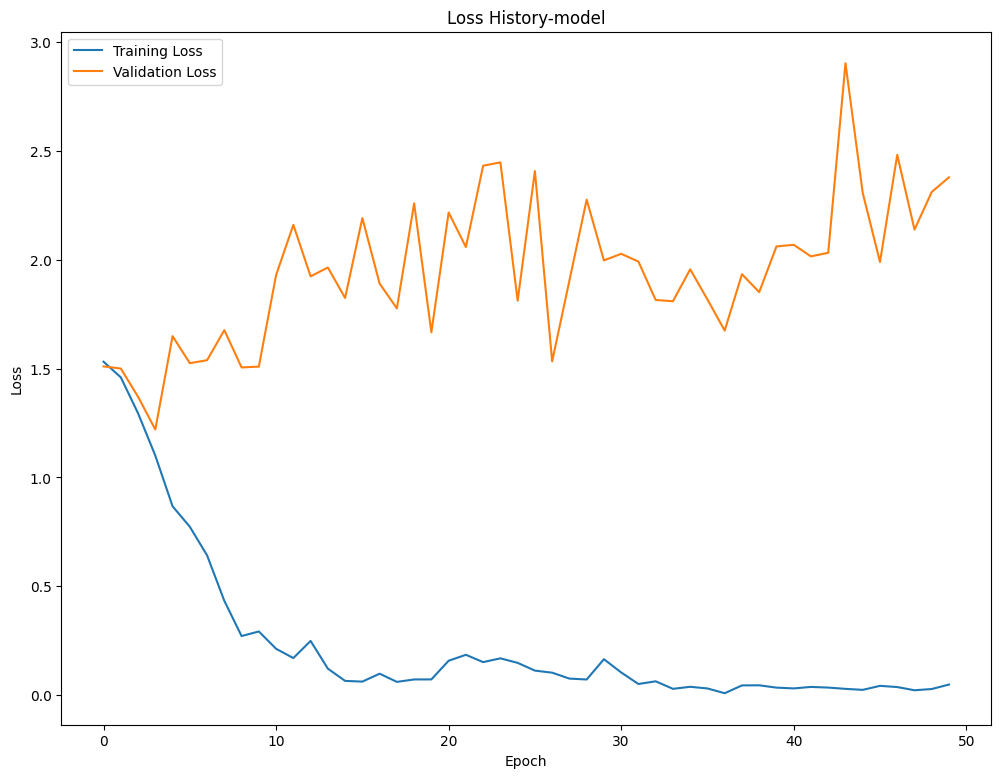

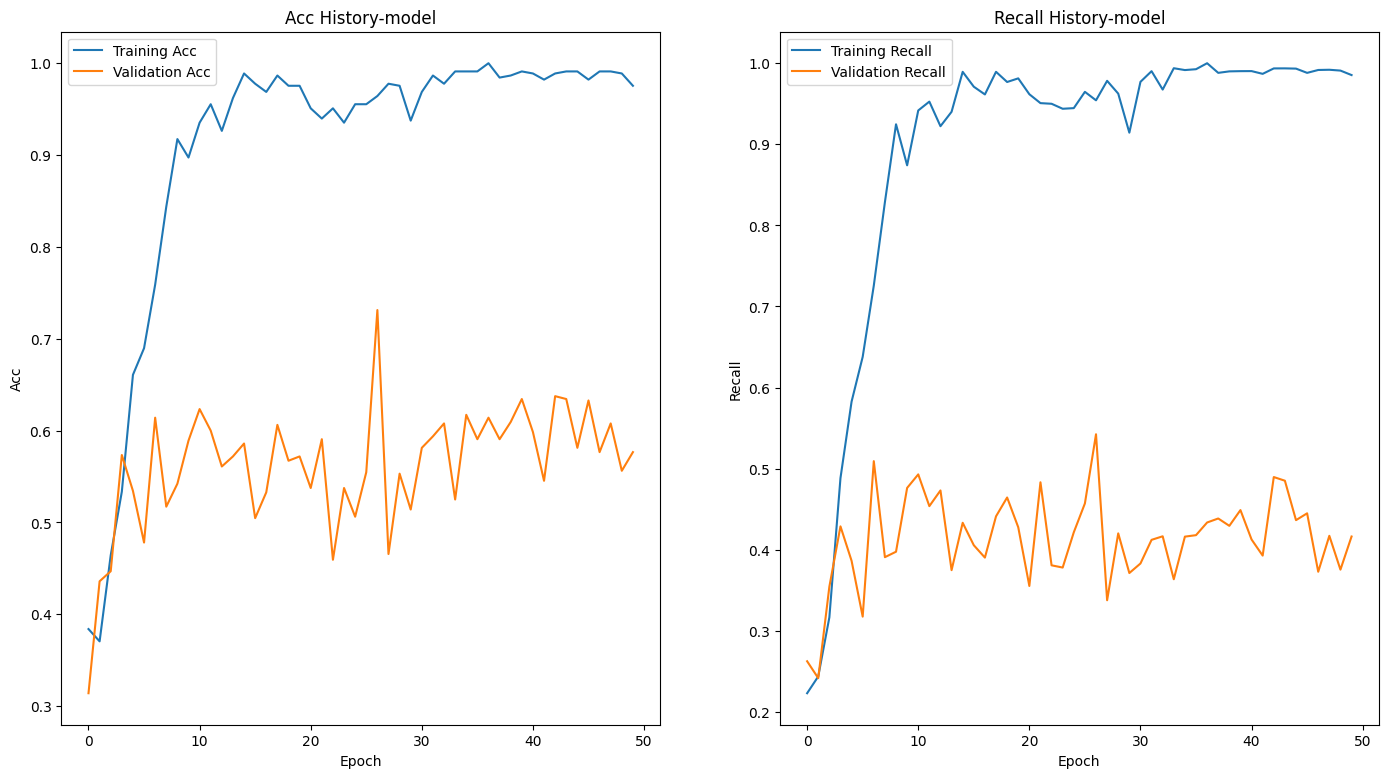

| ID | GPU | MEM |
------------------
|  0 |  6% | 19% |


In [116]:

class CompositeLoss(nn.Module):
    def __init__(self, model, alpha=0.000):
        super(CompositeLoss, self).__init__()
        # sc=len(train_norm_inv)/torch.tensor([158,86,53,32,11,70]).cuda()
        self.cross_entropy_loss = nn.CrossEntropyLoss()
        self.alpha = alpha
        self.model = model

    def forward(self, outputs, targets):
        # Кросс-энтропийная потеря
        ce_loss = self.cross_entropy_loss(outputs, targets)
        
        # L2-регуляризация (L2-norm of weights)
        l2_reg = torch.tensor(0.0).to(outputs.device)
        for param in self.model.parameters():
            l2_reg += torch.norm(param)
        
        # Композитная потеря: кросс-энтропия + L2-регуляризация
        composite_loss = ce_loss + self.alpha * l2_reg
        return composite_loss

# Пример использования
# Предположим, у нас есть модель
# Создание модели и композитной функции потерь


composite_loss_fn = CompositeLoss(model, alpha=0.00000)

def criterion(y_pred, y_true):
    return composite_loss_fn(y_pred, y_true)

def build_model():
    # model = smp.UnetPlusPlus(
    #     encoder_name='tu-'+seg_model ,     # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    #     encoder_weights=None,# use `imagenet` pre-trained weights for encoder initialization
    #     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    #     classes=1   ,     # model output channels (number of classes in your dataset)
    #     activation=None,
    # )
    input_dim = 512  # Размерность эмбеддингов из ResNet50
    hidden_dim = 512*4
    output_dim = 5  # Количество классов
    num_layers = 1
    base_model = ResNMEAN(input_dim, hidden_dim, output_dim, num_layers,dropout=0.3)
    
    base_model.to('cuda')
    return base_model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

x_pth_train,x_pth_val,y_pth_train,y_pth_val = train_test_split(x_pth , y_pth, test_size=0.2)


x_pth_train,y_pth_train,x_pth_val,y_pth_val = flatten(x_pth_train) ,flatten(y_pth_train),flatten(x_pth_val),flatten(y_pth_val)

train_dataset = MedicalDataset(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDataset(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_dataset_inv = MedicalDatasetInv(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset_inv  = MedicalDatasetInv(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_norm_inv = torch.utils.data.ConcatDataset([train_dataset, train_dataset_inv])
val_norm_inv = torch.utils.data.ConcatDataset([val_dataset, val_dataset_inv])

train_loader = DataLoader(train_norm_inv, batch_size=32,shuffle=True)
valid_loader = DataLoader(val_norm_inv, batch_size=32, shuffle=False)
for fold in range(1):
    
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                    config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                    anonymous=anonymous,
                    name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                    group=CFG.comment,
                    )
    train_loader, valid_loader = train_loader,valid_loader
    model     =   build_model()
    # unfreeze_last_n_layers(model, 2)
    
    composite_loss_fn = CompositeLoss(model, alpha=0.)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler =  fetch_scheduler(optimizer) 
    
    model, history = run_training(model, optimizer, scheduler,
                                device=CFG.device,
                                num_epochs=CFG.epochs)
    # run.finish()
    # display(ipd.IFrame(run.url, width=1000, height=720))
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()
    torch.save(model.state_dict(), 'R50Mean_state_dict')
    gpus = GPUtil.getGPUs()
    gpu = gpus[0]
    GPUtil.showUtilization()
    free_memory = gpu.memoryFree
    torch.cuda.empty_cache()
    gc.collect()

In [126]:
class ResNMEANBest(nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, num_layers=1, dropout=0.1):
        super(ResNMEANBest, self).__init__()

        # Load pre-trained CLIP model

        self.model = models.resnet101(pretrained=True)
        # for param in resnet.parameters():
        #     param.requires_grad = False
        original_conv1_weight = self.model.conv1.weight.data
        original_conv1_weight_mean = original_conv1_weight.mean(dim=1, keepdim=True)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model.conv1.weight.data = original_conv1_weight_mean
        
        self.model.fc = nn.Identity()
        self.fc1 = nn.Sequential(
                                nn.Linear(hidden_dim, hidden_dim//2),
                                nn.ReLU(),
                                nn.Dropout(dropout),
                                nn.Linear(hidden_dim//2, output_dim),
                                )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, c, seq_length,  h, w = x.shape
        cnn_embed_seq = []
        for t in range(seq_length):
            # with torch.no_grad():
                x_t = self.model(x[:, :, t, :, :].to('cuda').float())  # pass each frame through ResNet
                x_t = x_t.view(batch_size, -1)
                cnn_embed_seq.append(x_t)
            
        cnn_embed_seq = torch.stack(cnn_embed_seq, dim=1)
        mean_cnn_embed = cnn_embed_seq.mean(dim=1)
        output = self.fc1(mean_cnn_embed)
        
        
        return output

###############
### Fold: 0
###############


cuda: NVIDIA GeForce RTX 3090

Epoch 1/300

Train : 100%|██████████| 15/15 [00:22<00:00,  1.49s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=1.5520]


Train Acc: 0.3507 | Train Recall: 0.1975


Valid : 100%|██████████| 4/4 [00:03<00:00,  1.11it/s, gpu_memory=1.34 GB, lr=0.00020, valid_loss=1.5379]


Valid Acc: 0.3906 | Valid Recall: 0.2458
Valid Score Improved (-inf ---> 0.3906)
Model Saved


Epoch 2/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.23s/it, gpu_mem=15.75 GB, lr=0.00020, train_loss=1.4928]


Train Acc: 0.3826 | Train Recall: 0.2047


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.64it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=1.5120]


Valid Acc: 0.3828 | Valid Recall: 0.2396


Epoch 3/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.80 GB, lr=0.00020, train_loss=1.3917]


Train Acc: 0.3965 | Train Recall: 0.2272


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.73it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=1.4888]


Valid Acc: 0.3906 | Valid Recall: 0.2479


Epoch 4/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.75 GB, lr=0.00020, train_loss=1.2449]


Train Acc: 0.4458 | Train Recall: 0.3641


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=1.5031]


Valid Acc: 0.4453 | Valid Recall: 0.3130
Valid Score Improved (0.3906 ---> 0.4453)
Model Saved


Epoch 5/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=1.0777]


Train Acc: 0.5208 | Train Recall: 0.3647


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=1.6297]


Valid Acc: 0.4062 | Valid Recall: 0.2703


Epoch 6/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=1.0592]


Train Acc: 0.5514 | Train Recall: 0.4310


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.55 GB, lr=0.00020, valid_loss=1.3106]


Valid Acc: 0.5078 | Valid Recall: 0.3684
Valid Score Improved (0.4453 ---> 0.5078)
Model Saved


Epoch 7/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.80 GB, lr=0.00020, train_loss=0.9042]


Train Acc: 0.6104 | Train Recall: 0.5011


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.0234]


Valid Acc: 0.4375 | Valid Recall: 0.3292


Epoch 8/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.75 GB, lr=0.00020, train_loss=0.7867]


Train Acc: 0.6813 | Train Recall: 0.5931


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=1.4391]


Valid Acc: 0.5156 | Valid Recall: 0.3900
Valid Score Improved (0.5078 ---> 0.5156)
Model Saved


Epoch 9/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.6540]


Train Acc: 0.7417 | Train Recall: 0.6413


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=1.6894]


Valid Acc: 0.4219 | Valid Recall: 0.2775


Epoch 10/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.5765]


Train Acc: 0.7875 | Train Recall: 0.6886


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.55 GB, lr=0.00020, valid_loss=2.0074]


Valid Acc: 0.4297 | Valid Recall: 0.3556


Epoch 11/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.5642]


Train Acc: 0.7826 | Train Recall: 0.7136


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=1.6613]


Valid Acc: 0.4375 | Valid Recall: 0.3367


Epoch 12/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.4005]


Train Acc: 0.8757 | Train Recall: 0.8480


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.1860]


Valid Acc: 0.3750 | Valid Recall: 0.3190


Epoch 13/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.3815]


Train Acc: 0.8688 | Train Recall: 0.8505


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.2302]


Valid Acc: 0.4453 | Valid Recall: 0.3213


Epoch 14/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.16s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.3470]


Train Acc: 0.8861 | Train Recall: 0.8911


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.9798]


Valid Acc: 0.5078 | Valid Recall: 0.3896


Epoch 15/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.16s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.2757]


Train Acc: 0.8854 | Train Recall: 0.8628


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.0548]


Valid Acc: 0.3516 | Valid Recall: 0.2633


Epoch 16/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.17s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.2347]


Train Acc: 0.9125 | Train Recall: 0.9239


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.6585]


Valid Acc: 0.3984 | Valid Recall: 0.2958


Epoch 17/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.1855]


Train Acc: 0.9313 | Train Recall: 0.9189


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.86it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.3136]


Valid Acc: 0.4375 | Valid Recall: 0.3604


Epoch 18/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.2490]


Train Acc: 0.9174 | Train Recall: 0.8955


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.0184]


Valid Acc: 0.4922 | Valid Recall: 0.3671


Epoch 19/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.2563]


Train Acc: 0.9222 | Train Recall: 0.8972


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.5292]


Valid Acc: 0.3750 | Valid Recall: 0.3129


Epoch 20/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1735]


Train Acc: 0.9437 | Train Recall: 0.9473


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.76it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.5978]


Valid Acc: 0.5469 | Valid Recall: 0.4117
Valid Score Improved (0.5156 ---> 0.5469)
Model Saved


Epoch 21/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.1699]


Train Acc: 0.9313 | Train Recall: 0.9306


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.6305]


Valid Acc: 0.5312 | Valid Recall: 0.3792


Epoch 22/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1176]


Train Acc: 0.9590 | Train Recall: 0.9670


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.3867]


Valid Acc: 0.4766 | Valid Recall: 0.3117


Epoch 23/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0638]


Train Acc: 0.9896 | Train Recall: 0.9943


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.9698]


Valid Acc: 0.4766 | Valid Recall: 0.3158


Epoch 24/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0814]


Train Acc: 0.9778 | Train Recall: 0.9600


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9582]


Valid Acc: 0.5078 | Valid Recall: 0.3346


Epoch 25/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0635]


Train Acc: 0.9771 | Train Recall: 0.9823


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.1982]


Valid Acc: 0.4219 | Valid Recall: 0.3063


Epoch 26/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0476]


Train Acc: 0.9840 | Train Recall: 0.9892


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7742]


Valid Acc: 0.4922 | Valid Recall: 0.3492


Epoch 27/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0309]


Train Acc: 0.9917 | Train Recall: 0.9939


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.7970]


Valid Acc: 0.5156 | Valid Recall: 0.3746


Epoch 28/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0297]


Train Acc: 0.9896 | Train Recall: 0.9901


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1148]


Valid Acc: 0.5156 | Valid Recall: 0.3658


Epoch 29/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0312]


Train Acc: 0.9896 | Train Recall: 0.9899


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.7317]


Valid Acc: 0.5000 | Valid Recall: 0.3333


Epoch 30/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0456]


Train Acc: 0.9917 | Train Recall: 0.9931


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0853]


Valid Acc: 0.3828 | Valid Recall: 0.2779


Epoch 31/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0332]


Train Acc: 0.9861 | Train Recall: 0.9881


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.9908]


Valid Acc: 0.5312 | Valid Recall: 0.3846


Epoch 32/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0326]


Train Acc: 0.9896 | Train Recall: 0.9913


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9685]


Valid Acc: 0.4609 | Valid Recall: 0.3390


Epoch 33/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0433]


Train Acc: 0.9854 | Train Recall: 0.9904


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.9793]


Valid Acc: 0.4219 | Valid Recall: 0.3248


Epoch 34/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0351]


Train Acc: 0.9896 | Train Recall: 0.9736


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1417]


Valid Acc: 0.4609 | Valid Recall: 0.3312


Epoch 35/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.1258]


Train Acc: 0.9514 | Train Recall: 0.9626


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.2677]


Valid Acc: 0.5000 | Valid Recall: 0.3887


Epoch 36/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1671]


Train Acc: 0.9465 | Train Recall: 0.9521


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4992]


Valid Acc: 0.5078 | Valid Recall: 0.3604


Epoch 37/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.2339]


Train Acc: 0.9333 | Train Recall: 0.9273


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.76it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.9702]


Valid Acc: 0.3984 | Valid Recall: 0.3158


Epoch 38/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1436]


Train Acc: 0.9458 | Train Recall: 0.9406


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.4249]


Valid Acc: 0.5000 | Valid Recall: 0.3596


Epoch 39/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.1529]


Train Acc: 0.9417 | Train Recall: 0.9188


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.5945]


Valid Acc: 0.4453 | Valid Recall: 0.3495


Epoch 40/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1947]


Train Acc: 0.9396 | Train Recall: 0.9424


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.3787]


Valid Acc: 0.4922 | Valid Recall: 0.3783


Epoch 41/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0910]


Train Acc: 0.9792 | Train Recall: 0.9809


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.8956]


Valid Acc: 0.4453 | Valid Recall: 0.3887


Epoch 42/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0499]


Train Acc: 0.9819 | Train Recall: 0.9842


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.4819]


Valid Acc: 0.5625 | Valid Recall: 0.3896
Valid Score Improved (0.5469 ---> 0.5625)
Model Saved


Epoch 43/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0607]


Train Acc: 0.9833 | Train Recall: 0.9867


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.2031]


Valid Acc: 0.4609 | Valid Recall: 0.2971


Epoch 44/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.77 GB, lr=0.00020, train_loss=0.0325]


Train Acc: 0.9917 | Train Recall: 0.9937


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.9317]


Valid Acc: 0.5156 | Valid Recall: 0.3804


Epoch 45/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0371]


Train Acc: 0.9861 | Train Recall: 0.9742


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.6554]


Valid Acc: 0.4375 | Valid Recall: 0.3046


Epoch 46/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.77 GB, lr=0.00020, train_loss=0.0534]


Train Acc: 0.9792 | Train Recall: 0.9889


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.6784]


Valid Acc: 0.5391 | Valid Recall: 0.4125


Epoch 47/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0732]


Train Acc: 0.9722 | Train Recall: 0.9585


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.6447]


Valid Acc: 0.4297 | Valid Recall: 0.3704


Epoch 48/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.77 GB, lr=0.00020, train_loss=0.0484]


Train Acc: 0.9819 | Train Recall: 0.9851


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.4819]


Valid Acc: 0.5391 | Valid Recall: 0.4062


Epoch 49/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0497]


Train Acc: 0.9778 | Train Recall: 0.9793


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=3.0040]


Valid Acc: 0.5234 | Valid Recall: 0.3823


Epoch 50/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.77 GB, lr=0.00020, train_loss=0.0493]


Train Acc: 0.9917 | Train Recall: 0.9969


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.9613]


Valid Acc: 0.4844 | Valid Recall: 0.3481


Epoch 51/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0437]


Train Acc: 0.9729 | Train Recall: 0.9559


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=4.4366]


Valid Acc: 0.4766 | Valid Recall: 0.3714


Epoch 52/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.77 GB, lr=0.00020, train_loss=0.0393]


Train Acc: 0.9854 | Train Recall: 0.9878


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.4586]


Valid Acc: 0.5859 | Valid Recall: 0.4387
Valid Score Improved (0.5625 ---> 0.5859)
Model Saved


Epoch 53/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.81 GB, lr=0.00020, train_loss=0.0351]


Train Acc: 0.9917 | Train Recall: 0.9920


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.56 GB, lr=0.00020, valid_loss=2.2553]


Valid Acc: 0.5781 | Valid Recall: 0.4429


Epoch 54/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0292]


Train Acc: 0.9896 | Train Recall: 0.9800


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8021]


Valid Acc: 0.4375 | Valid Recall: 0.3183


Epoch 55/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0127]


Train Acc: 0.9958 | Train Recall: 0.9964


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6526]


Valid Acc: 0.5156 | Valid Recall: 0.4483


Epoch 56/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.78 GB, lr=0.00020, train_loss=0.0540]


Train Acc: 0.9833 | Train Recall: 0.9579


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1768]


Valid Acc: 0.4922 | Valid Recall: 0.3631


Epoch 57/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0356]


Train Acc: 0.9896 | Train Recall: 0.9925


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.5273]


Valid Acc: 0.6016 | Valid Recall: 0.5200
Valid Score Improved (0.5859 ---> 0.6016)
Model Saved


Epoch 58/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.78 GB, lr=0.00020, train_loss=0.0646]


Train Acc: 0.9729 | Train Recall: 0.9665


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1308]


Valid Acc: 0.6250 | Valid Recall: 0.4448
Valid Score Improved (0.6016 ---> 0.6250)
Model Saved


Epoch 59/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0730]


Train Acc: 0.9854 | Train Recall: 0.9869


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0516]


Valid Acc: 0.5078 | Valid Recall: 0.3854


Epoch 60/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0604]


Train Acc: 0.9833 | Train Recall: 0.9877


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9047]


Valid Acc: 0.5156 | Valid Recall: 0.3854


Epoch 61/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0659]


Train Acc: 0.9812 | Train Recall: 0.9711


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3371]


Valid Acc: 0.3828 | Valid Recall: 0.3125


Epoch 62/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0507]


Train Acc: 0.9778 | Train Recall: 0.9825


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1614]


Valid Acc: 0.5469 | Valid Recall: 0.4000


Epoch 63/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0216]


Train Acc: 0.9917 | Train Recall: 0.9943


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.85it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8054]


Valid Acc: 0.4844 | Valid Recall: 0.4426


Epoch 64/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0045]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8848]


Valid Acc: 0.5000 | Valid Recall: 0.3358


Epoch 65/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0057]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8877]


Valid Acc: 0.5469 | Valid Recall: 0.3750


Epoch 66/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0094]


Train Acc: 0.9979 | Train Recall: 0.9981


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8250]


Valid Acc: 0.5547 | Valid Recall: 0.3833


Epoch 67/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0134]


Train Acc: 0.9958 | Train Recall: 0.9944


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6700]


Valid Acc: 0.5234 | Valid Recall: 0.3875


Epoch 68/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0058]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.5095]


Valid Acc: 0.5625 | Valid Recall: 0.3896


Epoch 69/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0018]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.4857]


Valid Acc: 0.5391 | Valid Recall: 0.4167


Epoch 70/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0062]


Train Acc: 0.9979 | Train Recall: 0.9992


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9329]


Valid Acc: 0.5078 | Valid Recall: 0.3562


Epoch 71/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0089]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6204]


Valid Acc: 0.5781 | Valid Recall: 0.4083


Epoch 72/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0072]


Train Acc: 0.9979 | Train Recall: 0.9833


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7755]


Valid Acc: 0.5547 | Valid Recall: 0.3762


Epoch 73/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0146]


Train Acc: 0.9917 | Train Recall: 0.9865


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9463]


Valid Acc: 0.5391 | Valid Recall: 0.4208


Epoch 74/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0214]


Train Acc: 0.9917 | Train Recall: 0.9807


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5626]


Valid Acc: 0.4688 | Valid Recall: 0.3354


Epoch 75/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0112]


Train Acc: 0.9979 | Train Recall: 0.9973


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1418]


Valid Acc: 0.5156 | Valid Recall: 0.4513


Epoch 76/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0161]


Train Acc: 0.9917 | Train Recall: 0.9922


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8239]


Valid Acc: 0.5547 | Valid Recall: 0.4021


Epoch 77/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0379]


Train Acc: 0.9896 | Train Recall: 0.9955


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3992]


Valid Acc: 0.3984 | Valid Recall: 0.2604


Epoch 78/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0352]


Train Acc: 0.9896 | Train Recall: 0.9943


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2817]


Valid Acc: 0.5234 | Valid Recall: 0.3604


Epoch 79/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0481]


Train Acc: 0.9854 | Train Recall: 0.9907


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1015]


Valid Acc: 0.5000 | Valid Recall: 0.3913


Epoch 80/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0718]


Train Acc: 0.9833 | Train Recall: 0.9733


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3866]


Valid Acc: 0.5000 | Valid Recall: 0.3292


Epoch 81/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1057]


Train Acc: 0.9715 | Train Recall: 0.9778


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8030]


Valid Acc: 0.4219 | Valid Recall: 0.2762


Epoch 82/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0642]


Train Acc: 0.9778 | Train Recall: 0.9574


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6133]


Valid Acc: 0.5391 | Valid Recall: 0.4135


Epoch 83/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1139]


Train Acc: 0.9576 | Train Recall: 0.9549


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3272]


Valid Acc: 0.5078 | Valid Recall: 0.3526


Epoch 84/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.1740]


Train Acc: 0.9486 | Train Recall: 0.9660


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2642]


Valid Acc: 0.4375 | Valid Recall: 0.3329


Epoch 85/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1547]


Train Acc: 0.9507 | Train Recall: 0.9609


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7395]


Valid Acc: 0.3516 | Valid Recall: 0.2646


Epoch 86/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.1225]


Train Acc: 0.9688 | Train Recall: 0.9715


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2482]


Valid Acc: 0.4375 | Valid Recall: 0.3021


Epoch 87/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0798]


Train Acc: 0.9771 | Train Recall: 0.9840


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0310]


Valid Acc: 0.5312 | Valid Recall: 0.3583


Epoch 88/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0665]


Train Acc: 0.9812 | Train Recall: 0.9641


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0468]


Valid Acc: 0.5391 | Valid Recall: 0.3846


Epoch 89/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0446]


Train Acc: 0.9840 | Train Recall: 0.9771


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6616]


Valid Acc: 0.3828 | Valid Recall: 0.2975


Epoch 90/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0623]


Train Acc: 0.9792 | Train Recall: 0.9833


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.5216]


Valid Acc: 0.5156 | Valid Recall: 0.3846


Epoch 91/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0433]


Train Acc: 0.9875 | Train Recall: 0.9892


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0780]


Valid Acc: 0.4219 | Valid Recall: 0.2992


Epoch 92/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0426]


Train Acc: 0.9785 | Train Recall: 0.9664


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9715]


Valid Acc: 0.5156 | Valid Recall: 0.3292


Epoch 93/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1550]


Train Acc: 0.9646 | Train Recall: 0.9493


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2731]


Valid Acc: 0.5547 | Valid Recall: 0.4250


Epoch 94/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.1016]


Train Acc: 0.9674 | Train Recall: 0.9471


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0334]


Valid Acc: 0.4141 | Valid Recall: 0.3173


Epoch 95/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1475]


Train Acc: 0.9646 | Train Recall: 0.9688


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2034]


Valid Acc: 0.5078 | Valid Recall: 0.3783


Epoch 96/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0717]


Train Acc: 0.9812 | Train Recall: 0.9806


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2672]


Valid Acc: 0.4766 | Valid Recall: 0.3150


Epoch 97/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0402]


Train Acc: 0.9875 | Train Recall: 0.9767


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6975]


Valid Acc: 0.5859 | Valid Recall: 0.3906


Epoch 98/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0426]


Train Acc: 0.9819 | Train Recall: 0.9895


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6009]


Valid Acc: 0.4844 | Valid Recall: 0.3117


Epoch 99/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0899]


Train Acc: 0.9694 | Train Recall: 0.9758


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8699]


Valid Acc: 0.5703 | Valid Recall: 0.3896


Epoch 100/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0571]


Train Acc: 0.9833 | Train Recall: 0.9909


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6159]


Valid Acc: 0.5078 | Valid Recall: 0.3937


Epoch 101/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0542]


Train Acc: 0.9854 | Train Recall: 0.9888


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4590]


Valid Acc: 0.5156 | Valid Recall: 0.3750


Epoch 102/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0351]


Train Acc: 0.9875 | Train Recall: 0.9875


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4131]


Valid Acc: 0.5078 | Valid Recall: 0.3542


Epoch 103/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0190]


Train Acc: 0.9924 | Train Recall: 0.9786


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1672]


Valid Acc: 0.5156 | Valid Recall: 0.3729


Epoch 104/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0727]


Train Acc: 0.9750 | Train Recall: 0.9776


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0658]


Valid Acc: 0.3828 | Valid Recall: 0.2483


Epoch 105/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0832]


Train Acc: 0.9597 | Train Recall: 0.9722


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0667]


Valid Acc: 0.3203 | Valid Recall: 0.2400


Epoch 106/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0576]


Train Acc: 0.9764 | Train Recall: 0.9846


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2927]


Valid Acc: 0.4766 | Valid Recall: 0.2833


Epoch 107/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0235]


Train Acc: 0.9924 | Train Recall: 0.9756


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.1919]


Valid Acc: 0.2969 | Valid Recall: 0.2683


Epoch 108/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0396]


Train Acc: 0.9840 | Train Recall: 0.9879


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2886]


Valid Acc: 0.4219 | Valid Recall: 0.3410


Epoch 109/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0475]


Train Acc: 0.9792 | Train Recall: 0.9812


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.4686]


Valid Acc: 0.5078 | Valid Recall: 0.3583


Epoch 110/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0574]


Train Acc: 0.9833 | Train Recall: 0.9875


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8774]


Valid Acc: 0.4062 | Valid Recall: 0.3185


Epoch 111/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0566]


Train Acc: 0.9792 | Train Recall: 0.9826


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0209]


Valid Acc: 0.4766 | Valid Recall: 0.3429


Epoch 112/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0243]


Train Acc: 0.9917 | Train Recall: 0.9815


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1401]


Valid Acc: 0.4688 | Valid Recall: 0.3115


Epoch 113/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0317]


Train Acc: 0.9812 | Train Recall: 0.9881


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1707]


Valid Acc: 0.4453 | Valid Recall: 0.3171


Epoch 114/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0123]


Train Acc: 0.9958 | Train Recall: 0.9825


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5808]


Valid Acc: 0.4062 | Valid Recall: 0.2983


Epoch 115/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0113]


Train Acc: 0.9958 | Train Recall: 0.9962


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0272]


Valid Acc: 0.4922 | Valid Recall: 0.3463


Epoch 116/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0135]


Train Acc: 0.9958 | Train Recall: 0.9971


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7518]


Valid Acc: 0.4297 | Valid Recall: 0.2921


Epoch 117/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0069]


Train Acc: 0.9979 | Train Recall: 0.9983


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3531]


Valid Acc: 0.4766 | Valid Recall: 0.2963


Epoch 118/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0103]


Train Acc: 0.9938 | Train Recall: 0.9972


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1145]


Valid Acc: 0.4531 | Valid Recall: 0.2900


Epoch 119/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0066]


Train Acc: 0.9979 | Train Recall: 0.9983


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7739]


Valid Acc: 0.4531 | Valid Recall: 0.2783


Epoch 120/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0027]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8450]


Valid Acc: 0.5000 | Valid Recall: 0.3325


Epoch 121/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0010]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0726]


Valid Acc: 0.5078 | Valid Recall: 0.3596


Epoch 122/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0015]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0556]


Valid Acc: 0.5234 | Valid Recall: 0.3542


Epoch 123/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0010]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8547]


Valid Acc: 0.3906 | Valid Recall: 0.2783


Epoch 124/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0010]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9061]


Valid Acc: 0.4531 | Valid Recall: 0.2888


Epoch 125/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0019]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1586]


Valid Acc: 0.4297 | Valid Recall: 0.3231


Epoch 126/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0120]


Train Acc: 0.9979 | Train Recall: 0.9988


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4029]


Valid Acc: 0.4375 | Valid Recall: 0.2721


Epoch 127/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0208]


Train Acc: 0.9938 | Train Recall: 0.9867


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0132]


Valid Acc: 0.4844 | Valid Recall: 0.3012


Epoch 128/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0174]


Train Acc: 0.9938 | Train Recall: 0.9943


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7356]


Valid Acc: 0.5391 | Valid Recall: 0.4167


Epoch 129/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0043]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0895]


Valid Acc: 0.5078 | Valid Recall: 0.3375


Epoch 130/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0046]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2120]


Valid Acc: 0.5234 | Valid Recall: 0.3458


Epoch 131/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0088]


Train Acc: 0.9979 | Train Recall: 0.9987


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9312]


Valid Acc: 0.4531 | Valid Recall: 0.3062


Epoch 132/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0068]


Train Acc: 0.9924 | Train Recall: 0.9955


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7340]


Valid Acc: 0.5547 | Valid Recall: 0.3667


Epoch 133/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0052]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3260]


Valid Acc: 0.5234 | Valid Recall: 0.3375


Epoch 134/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0087]


Train Acc: 0.9979 | Train Recall: 0.9988


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4033]


Valid Acc: 0.4375 | Valid Recall: 0.3267


Epoch 135/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0157]


Train Acc: 0.9979 | Train Recall: 0.9991


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9474]


Valid Acc: 0.5312 | Valid Recall: 0.4033


Epoch 136/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0049]


Train Acc: 0.9979 | Train Recall: 0.9990


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0249]


Valid Acc: 0.3594 | Valid Recall: 0.3071


Epoch 137/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0011]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7545]


Valid Acc: 0.4531 | Valid Recall: 0.3004


Epoch 138/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0021]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8120]


Valid Acc: 0.5078 | Valid Recall: 0.3867


Epoch 139/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0012]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4593]


Valid Acc: 0.4844 | Valid Recall: 0.3167


Epoch 140/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0007]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6347]


Valid Acc: 0.4922 | Valid Recall: 0.3333


Epoch 141/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0017]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2647]


Valid Acc: 0.5547 | Valid Recall: 0.3917


Epoch 142/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0005]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0493]


Valid Acc: 0.5156 | Valid Recall: 0.3825


Epoch 143/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0010]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9072]


Valid Acc: 0.4844 | Valid Recall: 0.3567


Epoch 144/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0008]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9503]


Valid Acc: 0.4766 | Valid Recall: 0.3096


Epoch 145/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0029]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8856]


Valid Acc: 0.5156 | Valid Recall: 0.3788


Epoch 146/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0134]


Train Acc: 0.9958 | Train Recall: 0.9970


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.5090]


Valid Acc: 0.5156 | Valid Recall: 0.3421


Epoch 147/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0040]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0624]


Valid Acc: 0.4844 | Valid Recall: 0.3192


Epoch 148/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0011]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9843]


Valid Acc: 0.5078 | Valid Recall: 0.3754


Epoch 149/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0103]


Train Acc: 0.9979 | Train Recall: 0.9988


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4913]


Valid Acc: 0.4297 | Valid Recall: 0.2963


Epoch 150/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0094]


Train Acc: 0.9979 | Train Recall: 0.9990


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0148]


Valid Acc: 0.4688 | Valid Recall: 0.3121


Epoch 151/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0043]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4604]


Valid Acc: 0.5078 | Valid Recall: 0.3083


Epoch 152/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0166]


Train Acc: 0.9938 | Train Recall: 0.9952


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1655]


Valid Acc: 0.4922 | Valid Recall: 0.4002


Epoch 153/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0471]


Train Acc: 0.9882 | Train Recall: 0.9936


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2629]


Valid Acc: 0.4922 | Valid Recall: 0.3354


Epoch 154/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0143]


Train Acc: 0.9938 | Train Recall: 0.9950


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0012]


Valid Acc: 0.4844 | Valid Recall: 0.3429


Epoch 155/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0177]


Train Acc: 0.9938 | Train Recall: 0.9950


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1082]


Valid Acc: 0.5234 | Valid Recall: 0.3830


Epoch 156/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0318]


Train Acc: 0.9917 | Train Recall: 0.9898


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9588]


Valid Acc: 0.4531 | Valid Recall: 0.3183


Epoch 157/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0438]


Train Acc: 0.9799 | Train Recall: 0.9699


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6170]


Valid Acc: 0.5078 | Valid Recall: 0.3492


Epoch 158/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0505]


Train Acc: 0.9785 | Train Recall: 0.9698


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9261]


Valid Acc: 0.3906 | Valid Recall: 0.3021


Epoch 159/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0566]


Train Acc: 0.9750 | Train Recall: 0.9781


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3866]


Valid Acc: 0.5312 | Valid Recall: 0.3708


Epoch 160/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0840]


Train Acc: 0.9750 | Train Recall: 0.9790


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2242]


Valid Acc: 0.4141 | Valid Recall: 0.2721


Epoch 161/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1298]


Train Acc: 0.9563 | Train Recall: 0.9494


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5849]


Valid Acc: 0.4766 | Valid Recall: 0.3642


Epoch 162/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0797]


Train Acc: 0.9792 | Train Recall: 0.9807


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.6405]


Valid Acc: 0.3281 | Valid Recall: 0.2454


Epoch 163/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0594]


Train Acc: 0.9812 | Train Recall: 0.9836


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3113]


Valid Acc: 0.4688 | Valid Recall: 0.3533


Epoch 164/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0804]


Train Acc: 0.9729 | Train Recall: 0.9781


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5826]


Valid Acc: 0.4375 | Valid Recall: 0.3475


Epoch 165/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0955]


Train Acc: 0.9576 | Train Recall: 0.9517


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6503]


Valid Acc: 0.4922 | Valid Recall: 0.3679


Epoch 166/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0701]


Train Acc: 0.9771 | Train Recall: 0.9758


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.0247]


Valid Acc: 0.4375 | Valid Recall: 0.3710


Epoch 167/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0738]


Train Acc: 0.9771 | Train Recall: 0.9823


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5110]


Valid Acc: 0.3203 | Valid Recall: 0.3029


Epoch 168/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0437]


Train Acc: 0.9917 | Train Recall: 0.9883


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7716]


Valid Acc: 0.4844 | Valid Recall: 0.3552


Epoch 169/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0213]


Train Acc: 0.9938 | Train Recall: 0.9928


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5459]


Valid Acc: 0.4453 | Valid Recall: 0.3292


Epoch 170/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0220]


Train Acc: 0.9896 | Train Recall: 0.9635


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9148]


Valid Acc: 0.4609 | Valid Recall: 0.3542


Epoch 171/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0228]


Train Acc: 0.9917 | Train Recall: 0.9793


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5346]


Valid Acc: 0.4531 | Valid Recall: 0.4106


Epoch 172/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0118]


Train Acc: 0.9958 | Train Recall: 0.9842


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3133]


Valid Acc: 0.5312 | Valid Recall: 0.4359


Epoch 173/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0254]


Train Acc: 0.9938 | Train Recall: 0.9948


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7768]


Valid Acc: 0.4688 | Valid Recall: 0.3438


Epoch 174/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0774]


Train Acc: 0.9771 | Train Recall: 0.9849


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5158]


Valid Acc: 0.4062 | Valid Recall: 0.2854


Epoch 175/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0299]


Train Acc: 0.9917 | Train Recall: 0.9940


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5346]


Valid Acc: 0.5000 | Valid Recall: 0.3635


Epoch 176/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0683]


Train Acc: 0.9778 | Train Recall: 0.9808


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0458]


Valid Acc: 0.4219 | Valid Recall: 0.3187


Epoch 177/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0913]


Train Acc: 0.9729 | Train Recall: 0.9665


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9360]


Valid Acc: 0.3438 | Valid Recall: 0.2758


Epoch 178/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0732]


Train Acc: 0.9833 | Train Recall: 0.9869


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7855]


Valid Acc: 0.3203 | Valid Recall: 0.2900


Epoch 179/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0450]


Train Acc: 0.9861 | Train Recall: 0.9895


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5606]


Valid Acc: 0.3750 | Valid Recall: 0.2942


Epoch 180/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0722]


Train Acc: 0.9757 | Train Recall: 0.9809


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1087]


Valid Acc: 0.4609 | Valid Recall: 0.3600


Epoch 181/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0986]


Train Acc: 0.9722 | Train Recall: 0.9705


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7635]


Valid Acc: 0.4375 | Valid Recall: 0.2979


Epoch 182/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0307]


Train Acc: 0.9938 | Train Recall: 0.9941


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5197]


Valid Acc: 0.3125 | Valid Recall: 0.2467


Epoch 183/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0203]


Train Acc: 0.9938 | Train Recall: 0.9945


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8113]


Valid Acc: 0.4766 | Valid Recall: 0.3333


Epoch 184/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0196]


Train Acc: 0.9938 | Train Recall: 0.9946


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7684]


Valid Acc: 0.5000 | Valid Recall: 0.3979


Epoch 185/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0344]


Train Acc: 0.9896 | Train Recall: 0.9912


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3268]


Valid Acc: 0.4609 | Valid Recall: 0.3629


Epoch 186/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0106]


Train Acc: 0.9979 | Train Recall: 0.9985


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5805]


Valid Acc: 0.3750 | Valid Recall: 0.3194


Epoch 187/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0065]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1415]


Valid Acc: 0.5156 | Valid Recall: 0.3458


Epoch 188/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0256]


Train Acc: 0.9938 | Train Recall: 0.9946


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.9446]


Valid Acc: 0.5703 | Valid Recall: 0.3927


Epoch 189/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0040]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0051]


Valid Acc: 0.4141 | Valid Recall: 0.3803


Epoch 190/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0050]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6291]


Valid Acc: 0.4453 | Valid Recall: 0.3483


Epoch 191/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0012]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2506]


Valid Acc: 0.4375 | Valid Recall: 0.3087


Epoch 192/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0064]


Train Acc: 0.9979 | Train Recall: 0.9985


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4888]


Valid Acc: 0.5000 | Valid Recall: 0.3304


Epoch 193/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0029]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7249]


Valid Acc: 0.4609 | Valid Recall: 0.3629


Epoch 194/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0179]


Train Acc: 0.9958 | Train Recall: 0.9845


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8164]


Valid Acc: 0.5234 | Valid Recall: 0.4054


Epoch 195/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0209]


Train Acc: 0.9917 | Train Recall: 0.9914


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6900]


Valid Acc: 0.5312 | Valid Recall: 0.3938


Epoch 196/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0541]


Train Acc: 0.9854 | Train Recall: 0.9864


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8163]


Valid Acc: 0.4922 | Valid Recall: 0.3804


Epoch 197/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0411]


Train Acc: 0.9854 | Train Recall: 0.9897


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5812]


Valid Acc: 0.4609 | Valid Recall: 0.3262


Epoch 198/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0591]


Train Acc: 0.9896 | Train Recall: 0.9892


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8125]


Valid Acc: 0.5469 | Valid Recall: 0.4292


Epoch 199/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0245]


Train Acc: 0.9917 | Train Recall: 0.9939


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8630]


Valid Acc: 0.4844 | Valid Recall: 0.3351


Epoch 200/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0139]


Train Acc: 0.9917 | Train Recall: 0.9893


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7733]


Valid Acc: 0.4844 | Valid Recall: 0.3658


Epoch 201/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0049]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5340]


Valid Acc: 0.3594 | Valid Recall: 0.2683


Epoch 202/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0022]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8335]


Valid Acc: 0.5391 | Valid Recall: 0.3688


Epoch 203/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0067]


Train Acc: 0.9979 | Train Recall: 0.9987


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.8793]


Valid Acc: 0.4375 | Valid Recall: 0.3296


Epoch 204/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0076]


Train Acc: 0.9979 | Train Recall: 0.9992


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1941]


Valid Acc: 0.4453 | Valid Recall: 0.3275


Epoch 205/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0052]


Train Acc: 0.9979 | Train Recall: 0.9983


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9934]


Valid Acc: 0.5078 | Valid Recall: 0.3450


Epoch 206/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0023]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3849]


Valid Acc: 0.5312 | Valid Recall: 0.3917


Epoch 207/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0087]


Train Acc: 0.9944 | Train Recall: 0.9778


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6654]


Valid Acc: 0.5547 | Valid Recall: 0.4104


Epoch 208/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0206]


Train Acc: 0.9826 | Train Recall: 0.9856


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1422]


Valid Acc: 0.5312 | Valid Recall: 0.3646


Epoch 209/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0274]


Train Acc: 0.9896 | Train Recall: 0.9764


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8612]


Valid Acc: 0.5000 | Valid Recall: 0.3542


Epoch 210/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.22s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0206]


Train Acc: 0.9896 | Train Recall: 0.9900


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5311]


Valid Acc: 0.4062 | Valid Recall: 0.2923


Epoch 211/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0111]


Train Acc: 0.9958 | Train Recall: 0.9956


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1180]


Valid Acc: 0.4844 | Valid Recall: 0.3838


Epoch 212/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0048]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0470]


Valid Acc: 0.5391 | Valid Recall: 0.3938


Epoch 213/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0128]


Train Acc: 0.9979 | Train Recall: 0.9985


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7743]


Valid Acc: 0.5469 | Valid Recall: 0.4033


Epoch 214/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0014]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3436]


Valid Acc: 0.5391 | Valid Recall: 0.4012


Epoch 215/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0037]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.4263]


Valid Acc: 0.5391 | Valid Recall: 0.3719


Epoch 216/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0113]


Train Acc: 0.9979 | Train Recall: 0.9992


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6229]


Valid Acc: 0.5625 | Valid Recall: 0.3875


Epoch 217/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0408]


Train Acc: 0.9861 | Train Recall: 0.9748


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4468]


Valid Acc: 0.4844 | Valid Recall: 0.3596


Epoch 218/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0561]


Train Acc: 0.9833 | Train Recall: 0.9877


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7501]


Valid Acc: 0.6016 | Valid Recall: 0.4344


Epoch 219/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0479]


Train Acc: 0.9896 | Train Recall: 0.9825


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4973]


Valid Acc: 0.5000 | Valid Recall: 0.4421


Epoch 220/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0204]


Train Acc: 0.9917 | Train Recall: 0.9935


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0599]


Valid Acc: 0.5234 | Valid Recall: 0.4249


Epoch 221/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0289]


Train Acc: 0.9917 | Train Recall: 0.9927


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8078]


Valid Acc: 0.4219 | Valid Recall: 0.3296


Epoch 222/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0680]


Train Acc: 0.9812 | Train Recall: 0.9844


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.2740]


Valid Acc: 0.3047 | Valid Recall: 0.2433


Epoch 223/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0645]


Train Acc: 0.9750 | Train Recall: 0.9773


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.1210]


Valid Acc: 0.2891 | Valid Recall: 0.2648


Epoch 224/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0336]


Train Acc: 0.9917 | Train Recall: 0.9928


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.7667]


Valid Acc: 0.3594 | Valid Recall: 0.3250


Epoch 225/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0258]


Train Acc: 0.9896 | Train Recall: 0.9883


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2097]


Valid Acc: 0.5234 | Valid Recall: 0.4129


Epoch 226/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0116]


Train Acc: 0.9979 | Train Recall: 0.9985


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2356]


Valid Acc: 0.4922 | Valid Recall: 0.3492


Epoch 227/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0163]


Train Acc: 0.9868 | Train Recall: 0.9900


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.3489]


Valid Acc: 0.5234 | Valid Recall: 0.3813


Epoch 228/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.22s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0158]


Train Acc: 0.9917 | Train Recall: 0.9792


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.76it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6426]


Valid Acc: 0.4766 | Valid Recall: 0.3725


Epoch 229/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0278]


Train Acc: 0.9938 | Train Recall: 0.9928


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.6966]


Valid Acc: 0.4141 | Valid Recall: 0.3179


Epoch 230/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0058]


Train Acc: 0.9979 | Train Recall: 0.9988


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9154]


Valid Acc: 0.4922 | Valid Recall: 0.3542


Epoch 231/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0053]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.3586]


Valid Acc: 0.5000 | Valid Recall: 0.3808


Epoch 232/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0029]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.3678]


Valid Acc: 0.4453 | Valid Recall: 0.3829


Epoch 233/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0034]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8601]


Valid Acc: 0.5312 | Valid Recall: 0.4125


Epoch 234/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0072]


Train Acc: 0.9979 | Train Recall: 0.9967


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7348]


Valid Acc: 0.5078 | Valid Recall: 0.3944


Epoch 235/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0163]


Train Acc: 0.9938 | Train Recall: 0.9787


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.2222]


Valid Acc: 0.4922 | Valid Recall: 0.3438


Epoch 236/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0965]


Train Acc: 0.9708 | Train Recall: 0.9788


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5150]


Valid Acc: 0.4219 | Valid Recall: 0.3271


Epoch 237/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0624]


Train Acc: 0.9778 | Train Recall: 0.9852


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7533]


Valid Acc: 0.5156 | Valid Recall: 0.3538


Epoch 238/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0792]


Train Acc: 0.9715 | Train Recall: 0.9737


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5224]


Valid Acc: 0.5156 | Valid Recall: 0.3725


Epoch 239/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0799]


Train Acc: 0.9757 | Train Recall: 0.9724


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9218]


Valid Acc: 0.4531 | Valid Recall: 0.3075


Epoch 240/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0296]


Train Acc: 0.9840 | Train Recall: 0.9759


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.4109]


Valid Acc: 0.4922 | Valid Recall: 0.3333


Epoch 241/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0745]


Train Acc: 0.9771 | Train Recall: 0.9846


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5479]


Valid Acc: 0.4531 | Valid Recall: 0.3312


Epoch 242/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.1488]


Train Acc: 0.9451 | Train Recall: 0.9151


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8060]


Valid Acc: 0.3359 | Valid Recall: 0.2817


Epoch 243/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.1360]


Train Acc: 0.9611 | Train Recall: 0.9627


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8560]


Valid Acc: 0.5234 | Valid Recall: 0.3438


Epoch 244/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0740]


Train Acc: 0.9729 | Train Recall: 0.9608


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8400]


Valid Acc: 0.4922 | Valid Recall: 0.3254


Epoch 245/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0447]


Train Acc: 0.9819 | Train Recall: 0.9852


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.76it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1424]


Valid Acc: 0.4844 | Valid Recall: 0.3471


Epoch 246/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0317]


Train Acc: 0.9938 | Train Recall: 0.9915


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.74it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7683]


Valid Acc: 0.5234 | Valid Recall: 0.3563


Epoch 247/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0486]


Train Acc: 0.9778 | Train Recall: 0.9846


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1575]


Valid Acc: 0.4531 | Valid Recall: 0.3580


Epoch 248/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0260]


Train Acc: 0.9896 | Train Recall: 0.9916


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.75it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2570]


Valid Acc: 0.4922 | Valid Recall: 0.3762


Epoch 249/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0112]


Train Acc: 0.9979 | Train Recall: 0.9983


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7582]


Valid Acc: 0.5625 | Valid Recall: 0.3721


Epoch 250/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0206]


Train Acc: 0.9924 | Train Recall: 0.9944


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1156]


Valid Acc: 0.5312 | Valid Recall: 0.3700


Epoch 251/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0138]


Train Acc: 0.9958 | Train Recall: 0.9973


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2965]


Valid Acc: 0.5078 | Valid Recall: 0.3546


Epoch 252/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0374]


Train Acc: 0.9833 | Train Recall: 0.9873


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6934]


Valid Acc: 0.3828 | Valid Recall: 0.3267


Epoch 253/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0136]


Train Acc: 0.9979 | Train Recall: 0.9991


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1385]


Valid Acc: 0.5078 | Valid Recall: 0.3692


Epoch 254/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0111]


Train Acc: 0.9889 | Train Recall: 0.9944


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1524]


Valid Acc: 0.5859 | Valid Recall: 0.4263


Epoch 255/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0079]


Train Acc: 0.9979 | Train Recall: 0.9978


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6636]


Valid Acc: 0.5703 | Valid Recall: 0.3856


Epoch 256/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0032]


Train Acc: 0.9979 | Train Recall: 0.9993


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8937]


Valid Acc: 0.5078 | Valid Recall: 0.3481


Epoch 257/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0025]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.7968]


Valid Acc: 0.5391 | Valid Recall: 0.3825


Epoch 258/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0016]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.6969]


Valid Acc: 0.6172 | Valid Recall: 0.4346


Epoch 259/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0009]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7262]


Valid Acc: 0.4297 | Valid Recall: 0.3004


Epoch 260/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0008]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.74it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0881]


Valid Acc: 0.5000 | Valid Recall: 0.3967


Epoch 261/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0007]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.85it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.1872]


Valid Acc: 0.5781 | Valid Recall: 0.3815


Epoch 262/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.22s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0015]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.9970]


Valid Acc: 0.3672 | Valid Recall: 0.3029


Epoch 263/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0148]


Train Acc: 0.9958 | Train Recall: 0.9979


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3049]


Valid Acc: 0.5234 | Valid Recall: 0.3846


Epoch 264/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0090]


Train Acc: 0.9979 | Train Recall: 0.9987


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5962]


Valid Acc: 0.3984 | Valid Recall: 0.2829


Epoch 265/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0074]


Train Acc: 0.9979 | Train Recall: 0.9992


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3808]


Valid Acc: 0.5000 | Valid Recall: 0.3681


Epoch 266/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0022]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6611]


Valid Acc: 0.5000 | Valid Recall: 0.3400


Epoch 267/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0024]


Train Acc: 0.9979 | Train Recall: 0.9991


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8477]


Valid Acc: 0.4766 | Valid Recall: 0.3046


Epoch 268/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0048]


Train Acc: 0.9979 | Train Recall: 0.9983


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.4446]


Valid Acc: 0.5156 | Valid Recall: 0.3525


Epoch 269/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0010]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.8268]


Valid Acc: 0.4766 | Valid Recall: 0.2983


Epoch 270/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0092]


Train Acc: 0.9979 | Train Recall: 0.9981


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2566]


Valid Acc: 0.5156 | Valid Recall: 0.3525


Epoch 271/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0336]


Train Acc: 0.9840 | Train Recall: 0.9837


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1353]


Valid Acc: 0.4453 | Valid Recall: 0.3611


Epoch 272/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0589]


Train Acc: 0.9833 | Train Recall: 0.9771


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8453]


Valid Acc: 0.5234 | Valid Recall: 0.3762


Epoch 273/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0644]


Train Acc: 0.9674 | Train Recall: 0.9618


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.1260]


Valid Acc: 0.4844 | Valid Recall: 0.3458


Epoch 274/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0216]


Train Acc: 0.9938 | Train Recall: 0.9938


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=2.8684]


Valid Acc: 0.5156 | Valid Recall: 0.3627


Epoch 275/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0117]


Train Acc: 0.9979 | Train Recall: 0.9978


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6045]


Valid Acc: 0.4766 | Valid Recall: 0.3369


Epoch 276/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0071]


Train Acc: 0.9979 | Train Recall: 0.9981


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6594]


Valid Acc: 0.4844 | Valid Recall: 0.3325


Epoch 277/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0161]


Train Acc: 0.9938 | Train Recall: 0.9803


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5656]


Valid Acc: 0.5234 | Valid Recall: 0.3756


Epoch 278/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0088]


Train Acc: 0.9903 | Train Recall: 0.9798


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0861]


Valid Acc: 0.5312 | Valid Recall: 0.3533


Epoch 279/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0035]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.7201]


Valid Acc: 0.3750 | Valid Recall: 0.2594


Epoch 280/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0032]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3023]


Valid Acc: 0.4766 | Valid Recall: 0.3525


Epoch 281/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0053]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3996]


Valid Acc: 0.5234 | Valid Recall: 0.3658


Epoch 282/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0183]


Train Acc: 0.9938 | Train Recall: 0.9955


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2422]


Valid Acc: 0.4453 | Valid Recall: 0.3015


Epoch 283/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0032]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.5070]


Valid Acc: 0.4609 | Valid Recall: 0.3419


Epoch 284/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0021]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.84it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.3926]


Valid Acc: 0.4688 | Valid Recall: 0.3440


Epoch 285/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0011]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.0521]


Valid Acc: 0.5078 | Valid Recall: 0.3463


Epoch 286/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0008]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0142]


Valid Acc: 0.4141 | Valid Recall: 0.3581


Epoch 287/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0032]


Train Acc: 0.9979 | Train Recall: 0.9853


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.2784]


Valid Acc: 0.4688 | Valid Recall: 0.3252


Epoch 288/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0006]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7250]


Valid Acc: 0.5078 | Valid Recall: 0.3502


Epoch 289/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0045]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.81it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7399]


Valid Acc: 0.4453 | Valid Recall: 0.2981


Epoch 290/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0118]


Train Acc: 0.9979 | Train Recall: 0.9988


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1149]


Valid Acc: 0.3750 | Valid Recall: 0.2777


Epoch 291/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0054]


Train Acc: 0.9979 | Train Recall: 0.9967


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.78it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.6613]


Valid Acc: 0.3828 | Valid Recall: 0.3023


Epoch 292/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0025]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.7878]


Valid Acc: 0.4062 | Valid Recall: 0.2992


Epoch 293/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0057]


Train Acc: 0.9944 | Train Recall: 0.9800


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.80it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=3.2795]


Valid Acc: 0.4609 | Valid Recall: 0.3554


Epoch 294/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0245]


Train Acc: 0.9896 | Train Recall: 0.9789


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.83it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.9346]


Valid Acc: 0.3203 | Valid Recall: 0.2588


Epoch 295/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.19s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0179]


Train Acc: 0.9958 | Train Recall: 0.9967


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=5.4555]


Valid Acc: 0.3516 | Valid Recall: 0.2346


Epoch 296/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0032]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.73it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.5479]


Valid Acc: 0.3359 | Valid Recall: 0.2317


Epoch 297/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.22s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0104]


Train Acc: 0.9979 | Train Recall: 0.9989


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.76it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.0070]


Valid Acc: 0.4531 | Valid Recall: 0.3117


Epoch 298/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.22s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0057]


Train Acc: 0.9979 | Train Recall: 0.9990


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.74it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.7186]


Valid Acc: 0.3047 | Valid Recall: 0.2183


Epoch 299/300

Train : 100%|██████████| 15/15 [00:18<00:00,  1.21s/it, gpu_mem=15.76 GB, lr=0.00020, train_loss=0.0055]


Train Acc: 0.9979 | Train Recall: 0.9990


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.79it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.2242]


Valid Acc: 0.3984 | Valid Recall: 0.2825


Epoch 300/300

Train : 100%|██████████| 15/15 [00:17<00:00,  1.20s/it, gpu_mem=15.79 GB, lr=0.00020, train_loss=0.0027]


Train Acc: 1.0000 | Train Recall: 1.0000


Valid : 100%|██████████| 4/4 [00:02<00:00,  1.77it/s, gpu_memory=1.51 GB, lr=0.00020, valid_loss=4.1715]


Valid Acc: 0.4922 | Valid Recall: 0.3221


Training complete in 1h 43m 26s
Best Score: 0.6250


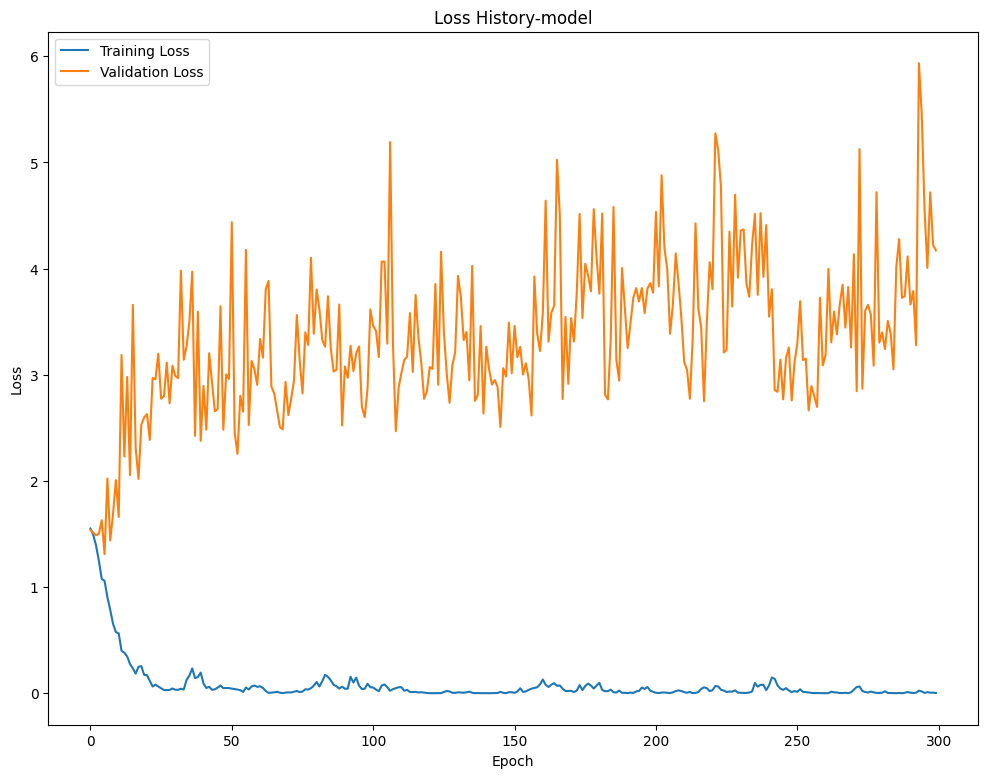

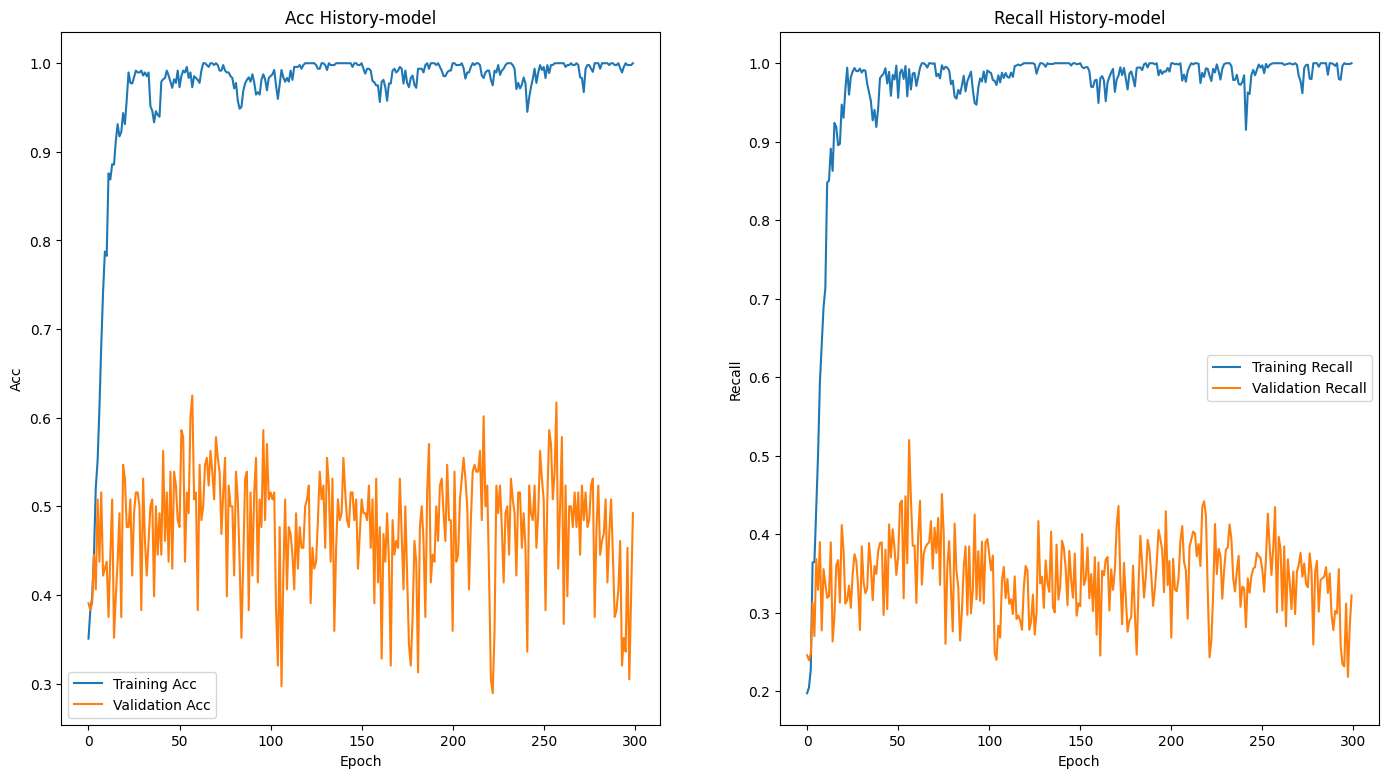

| ID | GPU | MEM |
------------------
|  0 |  4% |  9% |


In [151]:
class CompositeLoss(nn.Module):
    def __init__(self, model, alpha=0.000):
        super(CompositeLoss, self).__init__()
        # sc=len(train_norm_inv)/torch.tensor([158,86,53,32,11,70]).cuda()
        self.cross_entropy_loss = nn.CrossEntropyLoss()
        self.alpha = alpha
        self.model = model

    def forward(self, outputs, targets):
        # Кросс-энтропийная потеря
        ce_loss = self.cross_entropy_loss(outputs, targets)
        
        # L2-регуляризация (L2-norm of weights)
        l2_reg = torch.tensor(0.0).to(outputs.device)
        for param in self.model.parameters():
            l2_reg += torch.norm(param)
        
        # Композитная потеря: кросс-энтропия + L2-регуляризация
        composite_loss = ce_loss + self.alpha * l2_reg
        return composite_loss

# Пример использования
# Предположим, у нас есть модель
# Создание модели и композитной функции потерь


composite_loss_fn = CompositeLoss(model, alpha=0.00000)

def criterion(y_pred, y_true):
    return composite_loss_fn(y_pred, y_true)

def build_model():
    # model = smp.UnetPlusPlus(
    #     encoder_name='tu-'+seg_model ,     # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    #     encoder_weights=None,# use `imagenet` pre-trained weights for encoder initialization
    #     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    #     classes=1   ,     # model output channels (number of classes in your dataset)
    #     activation=None,
    # )
    input_dim = 512  # Размерность эмбеддингов из ResNet50
    hidden_dim = 512*4
    output_dim = 5  # Количество классов
    num_layers = 1
    base_model = ResNetAttMEAN(input_dim, hidden_dim, output_dim, num_layers,dropout=0.3)
    
    base_model.to('cuda')
    return base_model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

x_pth_train,x_pth_val,y_pth_train,y_pth_val = train_test_split(x_pth , y_pth, test_size=0.18)


x_pth_train,y_pth_train,x_pth_val,y_pth_val = flatten(x_pth_train) ,flatten(y_pth_train),flatten(x_pth_val),flatten(y_pth_val)

train_dataset = MedicalDataset(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset = MedicalDataset(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_dataset_inv = MedicalDatasetInv(x_pth_train,y_pth_train,transform=data_transforms['train'])
val_dataset_inv  = MedicalDatasetInv(x_pth_val,y_pth_val,transform=data_transforms['valid'])

train_norm_inv = torch.utils.data.ConcatDataset([train_dataset, train_dataset_inv])
val_norm_inv = torch.utils.data.ConcatDataset([val_dataset, val_dataset_inv])

train_loader = DataLoader(train_norm_inv, batch_size=32,shuffle=True)
valid_loader = DataLoader(val_norm_inv, batch_size=32, shuffle=False)
for fold in range(1):
    
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                    config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                    anonymous=anonymous,
                    name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                    group=CFG.comment,
                    )
    train_loader, valid_loader = train_loader,valid_loader
    model     =   build_model()
    # unfreeze_last_n_layers(model, 2)
    
    composite_loss_fn = CompositeLoss(model, alpha=0.)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler =  fetch_scheduler(optimizer) 
    
    model, history = run_training(model, optimizer, scheduler,
                                device=CFG.device,
                                num_epochs=CFG.epochs)
    # run.finish()
    # display(ipd.IFrame(run.url, width=1000, height=720))
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()
    torch.save(model.state_dict(), 'R50Mean_TESTBEST_state_dict')
    gpus = GPUtil.getGPUs()
    gpu = gpus[0]
    GPUtil.showUtilization()
    free_memory = gpu.memoryFree
    torch.cuda.empty_cache()
    gc.collect()

In [136]:
class CFG:
    seed          = 42
    debug         = False # set debug=False for Full Training
    exp_name      = 'Baselinev2'
    comment       = 'unet-efficientnet_b1-224x224-aug2-split2'
    model_name    = 'Eff'
    backbone      = 'efficientnet-b1'
    train_bs      = 128
    valid_bs      = train_bs*2
    img_size      = [224, 224]
    epochs        = 300
    lr            = 2e-4
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 1e-6
    T_max         = int(30000/train_bs*epochs)+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-5
    n_accumulate  = max(1, 32//train_bs)
    n_fold        = 5
    num_classes   = 6
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [146]:
gpus = GPUtil.getGPUs()
gpu = gpus[0]
GPUtil.showUtilization()
free_memory = gpu.memoryFree
torch.cuda.empty_cache()
gc.collect()

| ID | GPU | MEM |
------------------
|  0 | 10% |  6% |


0

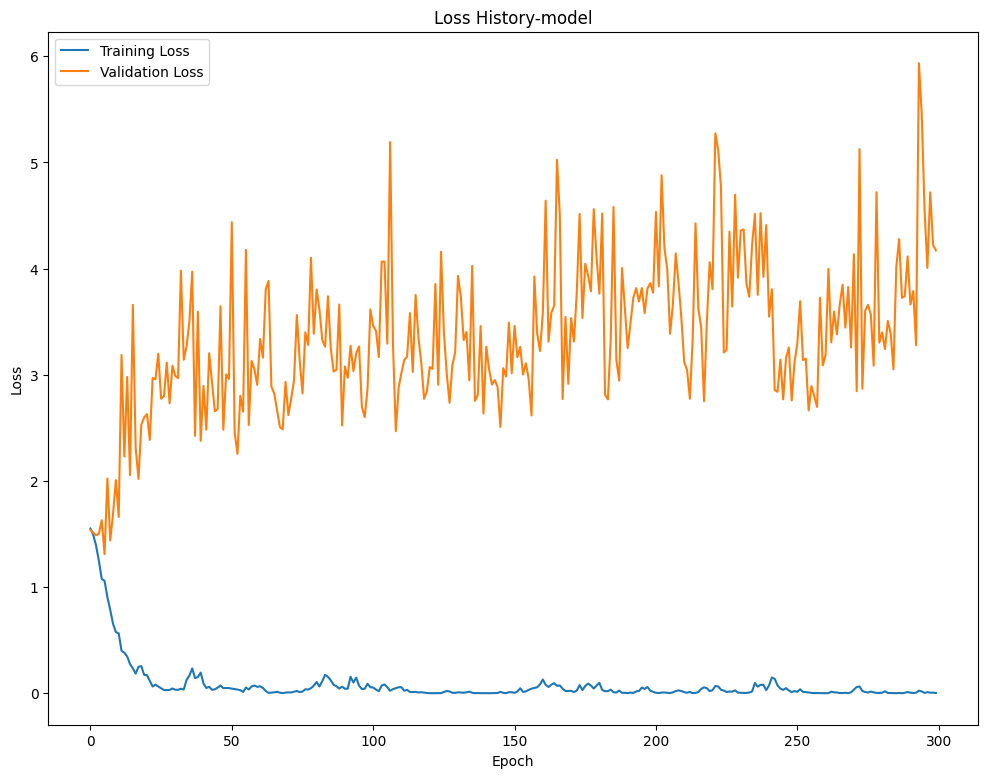

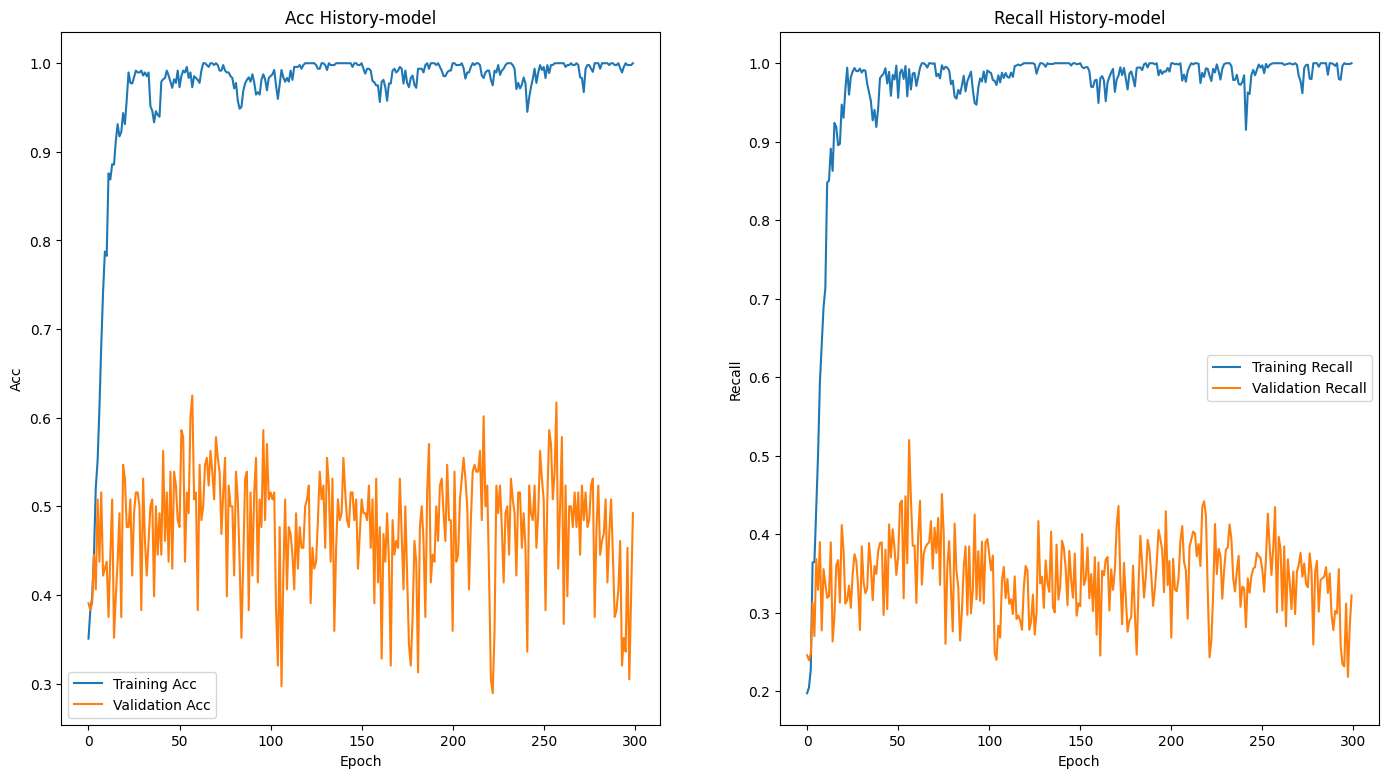

In [152]:
    plt.figure(figsize=(12,9))

    plt.plot(history['Train Loss'], label=f'Training Loss')
    plt.plot(history['Valid Loss'], label=f'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss History-model')


    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    plt.plot(history['Train Acc'], label=f'Training Acc')
    plt.plot(history['Valid Acc'], label=f'Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.title(f'Acc History-model')

    plt.subplot(1, 2, 2)
    plt.plot(history['Train Recall'], label=f'Training Recall')
    plt.plot(history['Valid Recall'], label=f'Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.title(f'Recall History-model')
    plt.show()